In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from xgcm import Grid
import numpy as np

In [2]:
import sys
sys.path.append('/home/db194/mom6_notebooks/helpers/')
from plot_helpers import *

In [3]:
def load_data(dir_name):

    exp_dic = {}
    
    exp_dic['prog'] = xr.open_mfdataset(dir_name + 'prog*.nc', decode_times=False)
    #exp_dic['cont'] = xr.open_mfdataset(dir_name + 'cont*.nc', decode_times=False)
    exp_dic['stat'] = xr.open_dataset(dir_name + 'ocean.stats.nc')

    return exp_dic

In [4]:
ds_HR = load_data('/scratch/db194/mom6/mar2025/phillips2layer/Phillips_2layer_4km/')

ERROR 1: PROJ: proj_create_from_database: Open of /ext3/miniforge/share/proj failed


In [5]:
ds_LR = load_data('/scratch/db194/mom6/mar2025/phillips2layer/Phillips_2layer_20km/')

In [6]:
ds_LR_GM = load_data('/scratch/db194/mom6/mar2025/phillips2layer/Phillips_2layer_20km_GM/')

In [7]:
ds_LR_ANN_GM = load_data('/scratch/db194/mom6/mar2025/phillips2layer/Phillips_2layer_20km_ANN_GM/')

In [8]:
ds_LR_ANN_C0 = load_data('/scratch/db194/mom6/mar2025/phillips2layer/Phillips_2layer_20km_ANN_non_dim_C0/')

In [9]:
ds_LR_ANN_C1 = load_data('/scratch/db194/mom6/mar2025/phillips2layer/Phillips_2layer_20km_ANN_non_dim_C1_decompose_true_inverse_gradient_form/')

In [10]:
ds_LR_ANN_C1_no_BT = load_data('/scratch/db194/mom6/mar2025/phillips2layer/Phillips_2layer_20km_ANN_non_dim_C1_decompose_true_inverse_gradient_form_BT_remove/')

In [11]:
ds_LR_ANN_C1_no_BT_new = load_data('/scratch/db194/mom6/base_experiments_2025/Phillip2Layer/Phillips_2layer_Xkm_ANN_template_ran/OUTPUT/')

In [13]:
#ds_LR_ANN_C1_decomposed_masked = load_data('/scratch/db194/mom6/mar2025/phillips2layer/Phillips_2layer_20km_ANN_non_dim_C1_decompose_true_mask_true/')

In [14]:
#ds_LR_ANN_C1_decomposed_noBT = load_data('/scratch/db194/mom6/mar2025/phillips2layer/Phillips_2layer_20km_ANN_non_dim_C1_decompose_true_mask_true_BTremove_true/')

In [12]:
ds_dic = {'HR': ds_HR,
          'LR': ds_LR,
          'LR_GM' : ds_LR_GM,
          'LR_ANN_GM': ds_LR_ANN_GM,
          'LR_ANN_C0': ds_LR_ANN_C0,
          'LR_ANN_C1': ds_LR_ANN_C1,
          'LR_ANN_C1_no_BT': ds_LR_ANN_C1_no_BT,
          'LR_ANN_C1_no_BT_new': ds_LR_ANN_C1_no_BT_new,
          #'LR_ANN_C1_decompose': ds_LR_ANN_C1_decomposed,
          #'LR_ANN_C1_decompose_masked': ds_LR_ANN_C1_decomposed_masked,
          #'LR_ANN_C1_decomposed_no_BT': ds_LR_ANN_C1_decomposed_noBT
         }

In [14]:
sub_keys = ['HR', 'LR', 'LR_ANN_GM', 'LR_ANN_C1']
sub_keys2 = ['HR', 'LR']
sub_keys_ANN = ['LR_ANN_GM', 'LR_ANN_C0', 'LR_ANN_C1','LR_ANN_C1_no_BT']

sub_keys = ['LR_ANN_C1_no_BT', 'LR_ANN_C1_no_BT_new']
#sub_keys_2 = ['LR_ANN_GM', 'LR_ANN_C0',  'LR_ANN_C1_decompose']
#sub_keys_3= ['LR_ANN_C1', 'LR_ANN_C1_decomposed_no_BT']

#sub_keys_C1 = ['LR_ANN_C1', 'LR_ANN_C1_decompose', 'LR_ANN_C1_decompose_masked', 'LR_ANN_C1_decomposed_no_BT']

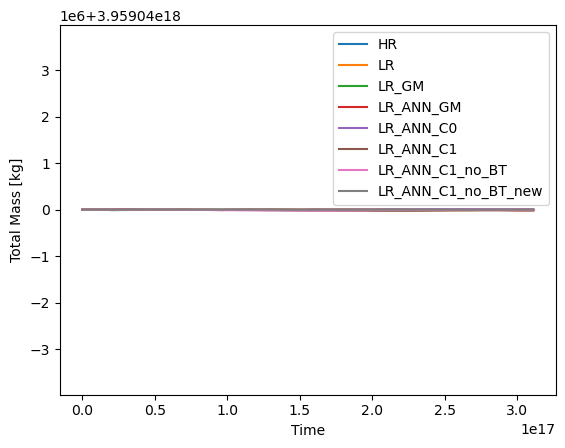

In [15]:
for k in ds_dic.keys():
    ds_dic[k]['stat'].Mass.plot(label=k)

plt.legend()

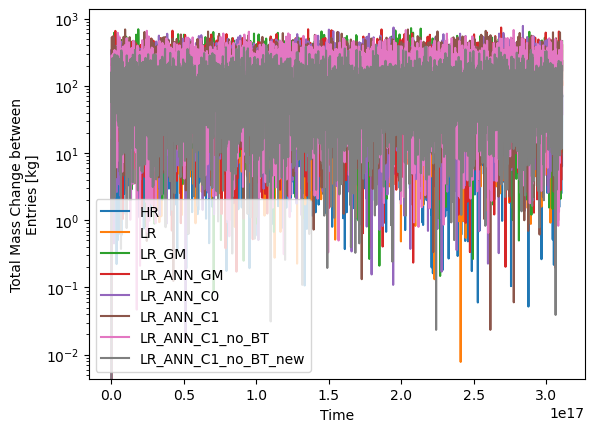

In [16]:
for k in ds_dic.keys():
    np.abs(ds_dic[k]['stat'].Mass_chg).plot(label=k)

plt.legend()
plt.yscale('log')

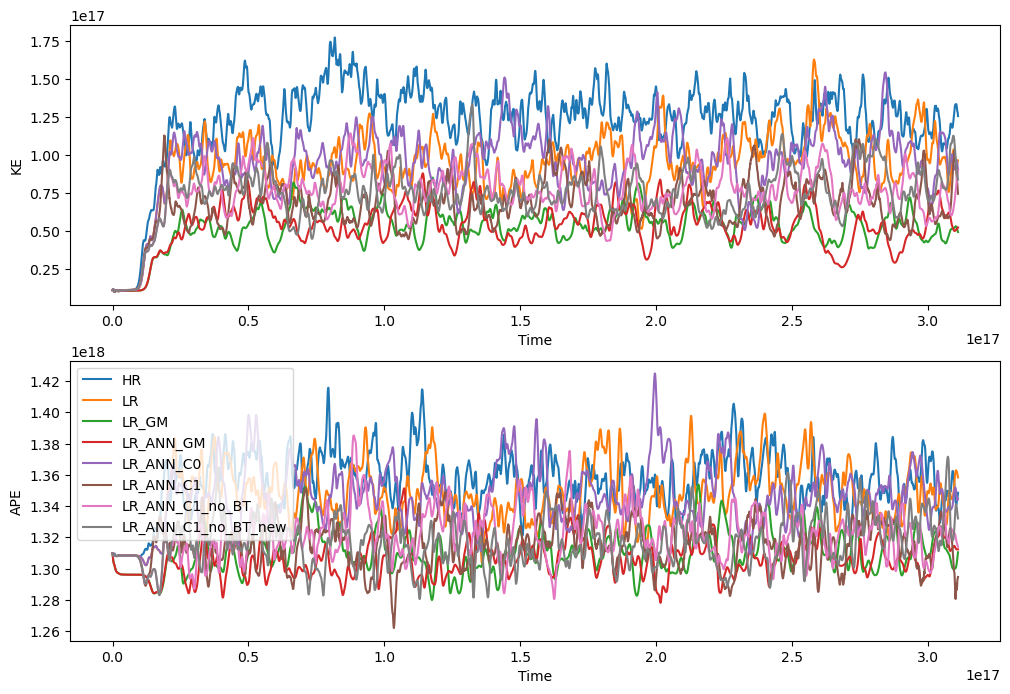

In [17]:
plt.figure(figsize=(12, 8))

plt.subplot(211)
for k in ds_dic.keys():
    ds_dic[k]['stat'].KE.sum('Layer').plot(label=k)



plt.subplot(212)
for k in ds_dic.keys():
    ds_dic[k]['stat'].APE.sum('Interface').plot(label=k)

plt.legend()

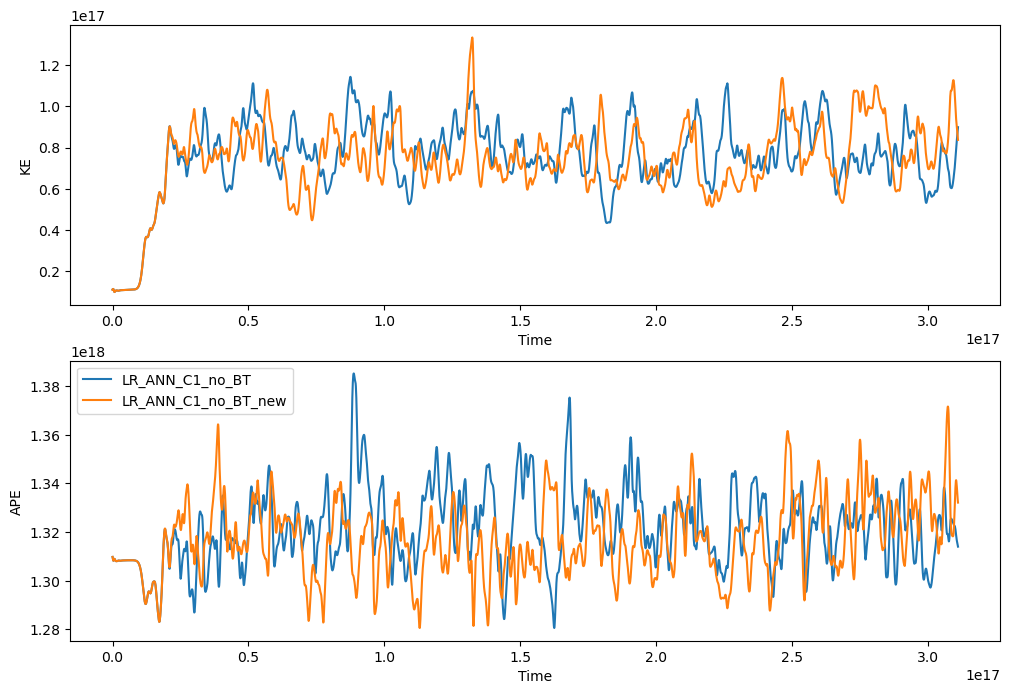

In [18]:
plt.figure(figsize=(12, 8))

plt.subplot(211)
for k in sub_keys:
    ds_dic[k]['stat'].KE.sum('Layer').plot(label=k)



plt.subplot(212)
for k in sub_keys:
    ds_dic[k]['stat'].APE.sum('Interface').plot(label=k)

plt.legend()

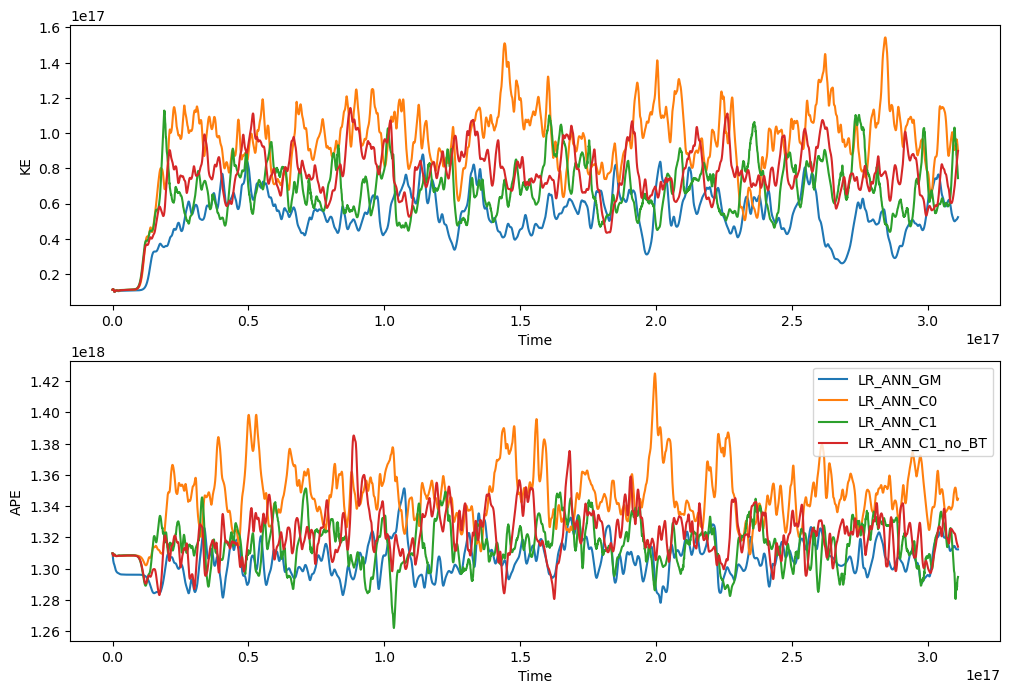

In [25]:
plt.figure(figsize=(12, 8))

plt.subplot(211)
for k in sub_keys_ANN:
    ds_dic[k]['stat'].KE.sum('Layer').plot(label=k)



plt.subplot(212)
for k in sub_keys_ANN:
    ds_dic[k]['stat'].APE.sum('Interface').plot(label=k)

plt.legend()

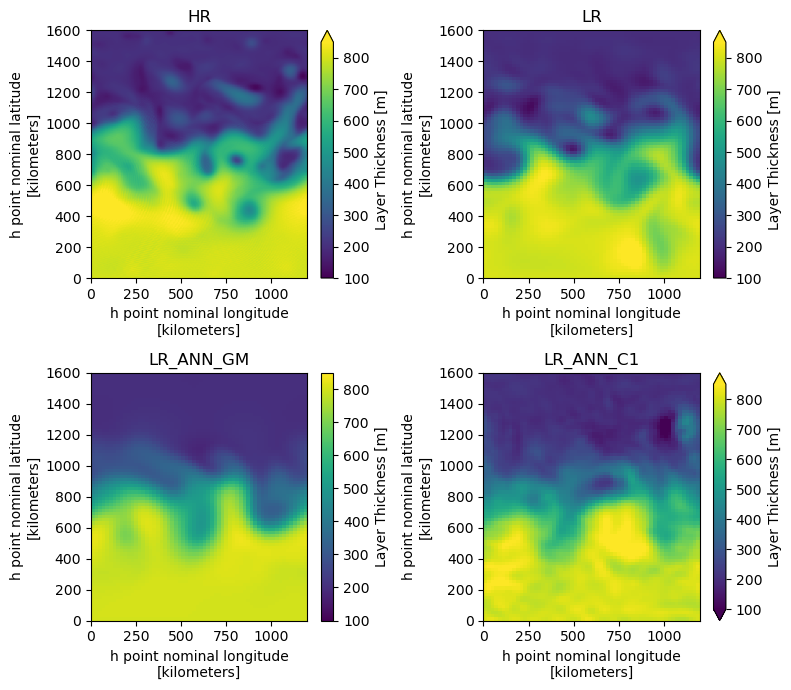

In [20]:
plt.figure(figsize=(8, 7))

vmin = 100
vmax = 850

for i, k in enumerate(sub_keys):

    plt.subplot(2,2, 1+i)
    ds_dic[k]['prog'].h.isel(Time=-1, zl=0).plot(vmin=vmin, vmax=vmax)
    plt.title(k)

plt.tight_layout()

In [19]:
def plot(idT): 
    plt.figure(figsize=(8, 7))
    
    vmin = -5e-5
    
    for i, k in enumerate(sub_keys):
    
        plt.subplot(2,2, 1+i)
        ds_dic[k]['prog'].RV.isel(Time=idT, zl=0).plot(vmin=vmin)
        plt.title(k)
    
    plt.tight_layout()

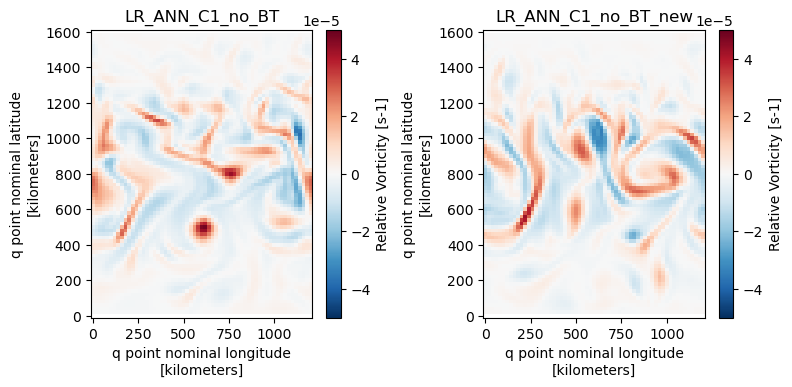

In [20]:
plot(350)


KeyboardInterrupt



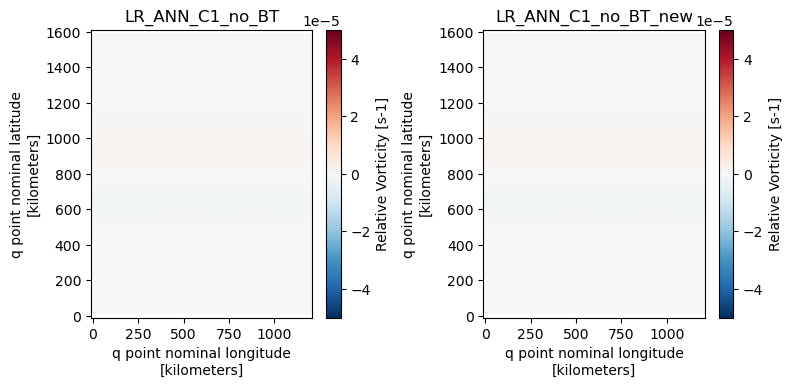

In [21]:
create_animation(plot, range(0,360), 'P2L_vort.gif', dpi=100, FPS=6)

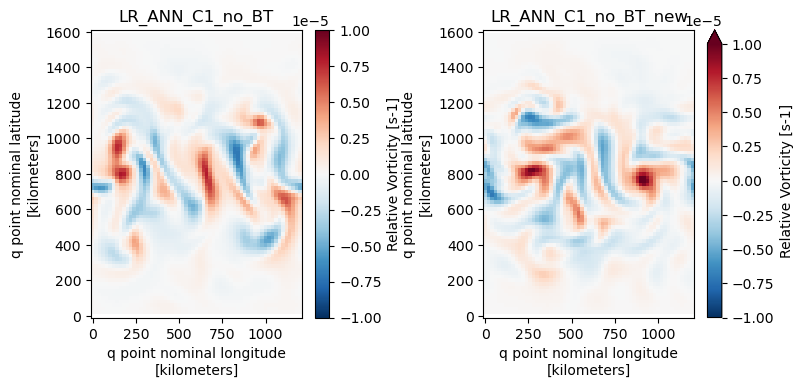

In [22]:
plt.figure(figsize=(8, 7))

vmin = -1e-5

for i, k in enumerate(sub_keys):

    plt.subplot(2,2, 1+i)
    ds_dic[k]['prog'].RV.isel(Time=-1, zl=1).plot(vmin=vmin)
    plt.title(k)

plt.tight_layout()

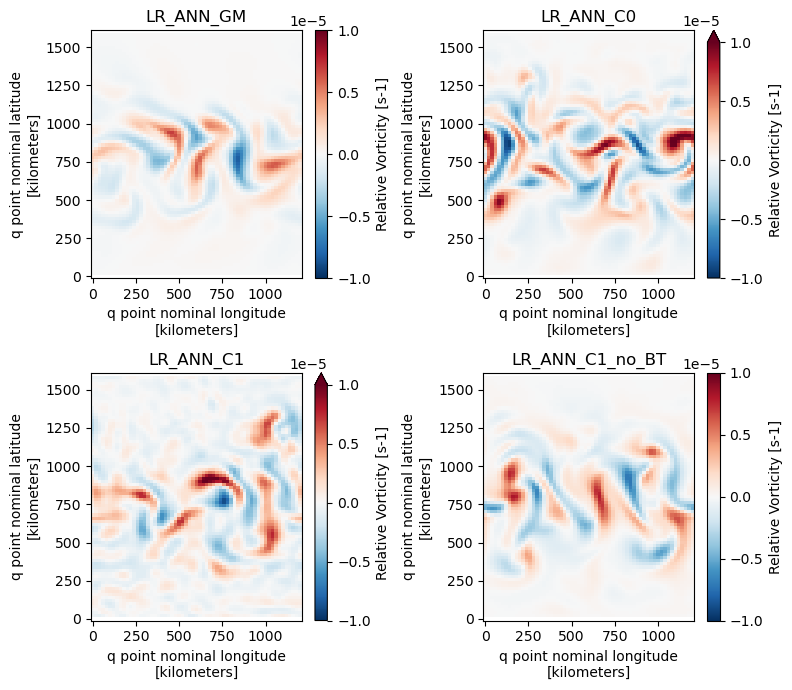

In [23]:
plt.figure(figsize=(8, 7))

vmin = -1e-5

for i, k in enumerate(sub_keys_ANN):

    plt.subplot(2,2, 1+i)
    ds_dic[k]['prog'].RV.isel(Time=-1, zl=1).plot(vmin=vmin)
    plt.title(k)

plt.tight_layout()

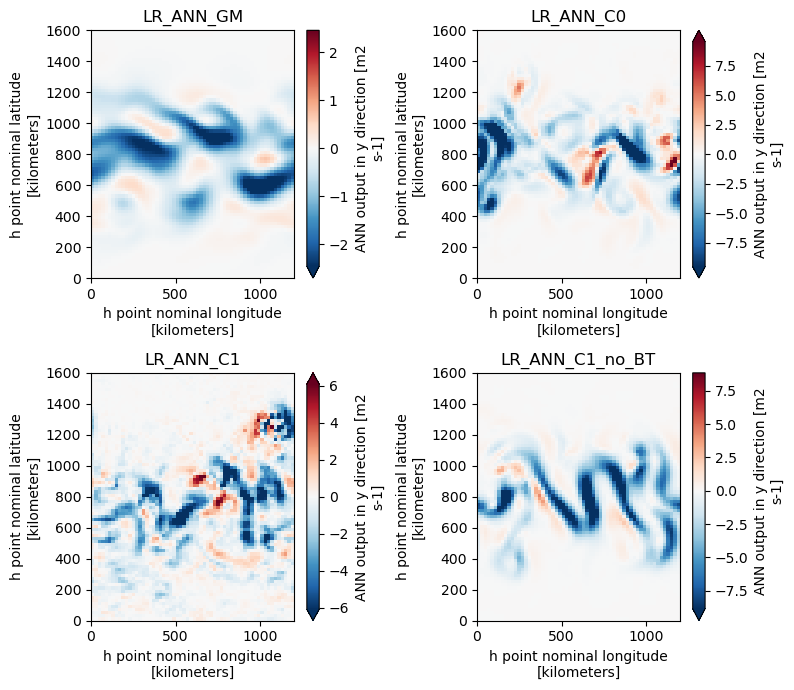

In [27]:
plt.figure(figsize=(8, 7))

vmin = 100
vmax = 850

for i, k in enumerate(sub_keys_ANN):

    plt.subplot(2,2, 1+i)
    
    try:
        ds_dic[k]['prog'].Fy.isel(Time=-1, zl=1).plot(robust=True)
    except:
        pass
    plt.title(k)

plt.tight_layout()

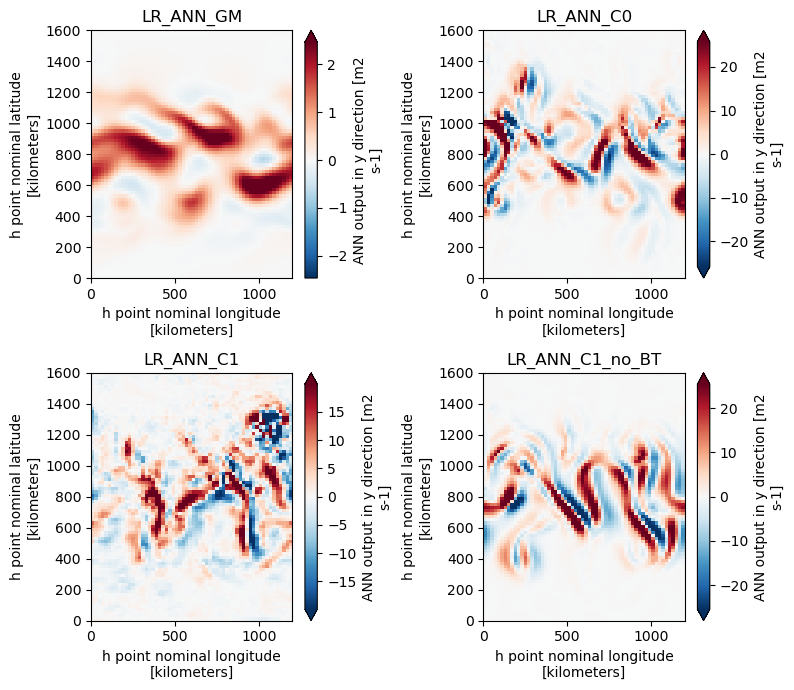

In [28]:
plt.figure(figsize=(8, 7))

vmin = 100
vmax = 850

for i, k in enumerate(sub_keys_ANN):

    plt.subplot(2,2, 1+i)
    
    try:
        ds_dic[k]['prog'].Fy.isel(Time=-1, zl=0).plot(robust=True)
    except:
        pass
    plt.title(k)

plt.tight_layout()

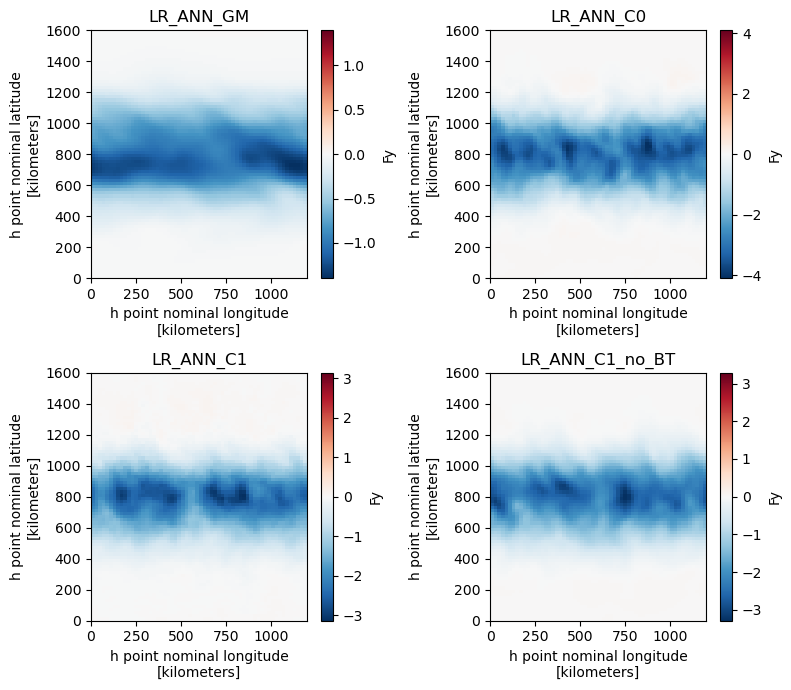

In [29]:
plt.figure(figsize=(8, 7))

for i, k in enumerate(sub_keys_ANN):

    plt.subplot(2,2, 1+i)
    
    try:
        ds_dic[k]['prog'].Fy.sel(Time=slice(1500, 3000)).isel(zl=1).mean(['Time']).plot()
    except:
        pass
    plt.title(k)

plt.tight_layout()

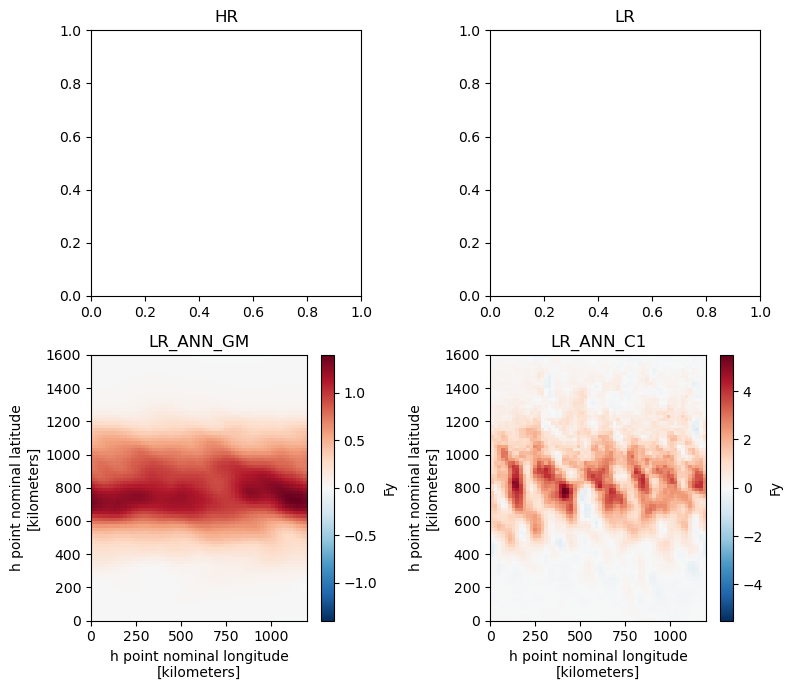

In [42]:
plt.figure(figsize=(8, 7))

for i, k in enumerate(sub_keys):

    plt.subplot(2,2, 1+i)
    
    try:
        ds_dic[k]['prog'].Fy.sel(Time=slice(1500, 3000)).isel(zl=0).mean(['Time']).plot()
    except:
        pass
    plt.title(k)

plt.tight_layout()

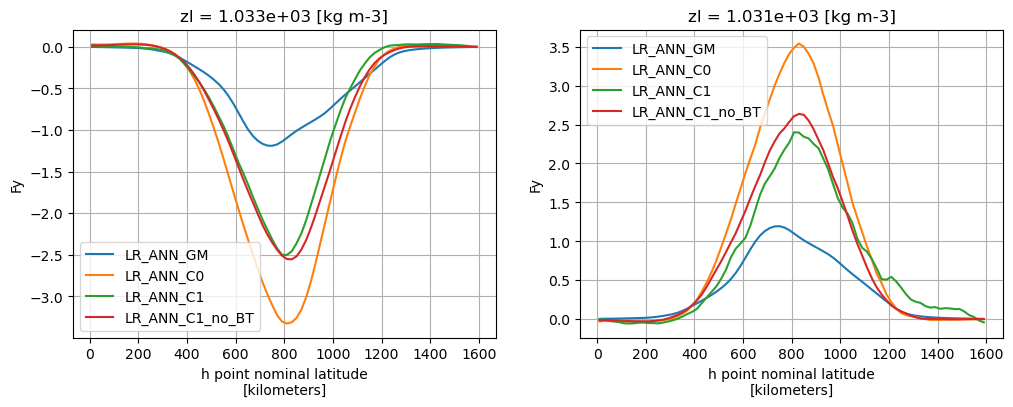

In [30]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
for i, k in enumerate(sub_keys_ANN):
    try:
        (ds_dic[k]['prog'].Fy).sel(Time=slice(1500, 3000)).isel(zl=1).mean(['Time','xh']).plot(label=k)
    except:
        pass
plt.legend()
plt.grid()

plt.subplot(122)
for i, k in enumerate(sub_keys_ANN):
    try:
        (ds_dic[k]['prog'].Fy).sel(Time=slice(1500, 3000)).isel(zl=0).mean(['Time','xh']).plot(label=k)
    except:
        pass
plt.legend()
plt.grid()


In [27]:
def mag_gradU(ds):
    return (ds['prog'].dudx**2 + 
            ds['prog'].dudy**2 +
            ds['prog'].dvdx**2 +
            ds['prog'].dvdy**2) ** 0.5

(array([2.40000e+01, 4.29000e+02, 6.53200e+03, 4.23740e+04, 9.60880e+04,
        1.19463e+05, 1.38428e+05, 7.62770e+04, 5.15000e+03, 3.50000e+01]),
 array([-7.38850395, -7.04924666, -6.70998937, -6.37073207, -6.03147478,
        -5.69221749, -5.3529602 , -5.0137029 , -4.67444561, -4.33518832,
        -3.99593103]),
 <BarContainer object of 10 artists>)

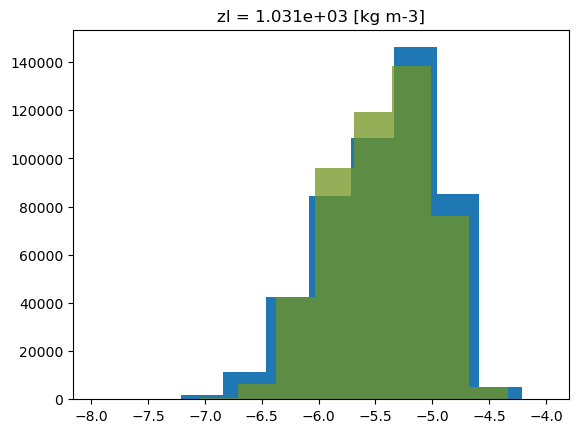

In [30]:
np.log10(mag_gradU(ds_dic['LR_ANN_C0']).sel(Time=slice(1000, 1500)).isel(zl=0)).plot()
np.log10(mag_gradU(ds_dic['LR_ANN_C1']).sel(Time=slice(1000, 1500)).isel(zl=0)).plot(alpha=0.5)
np.log10(mag_gradU(ds_dic['LR_ANN_C1_decompose']).sel(Time=slice(1000, 1500)).isel(zl=0)).plot(alpha=0.5)
#np.log10(mag_gradU).sel(Time=slice(1000, 1500)).isel(zl=1).plot(alpha=0.6)

In [ ]:
for i, k in enumerate(sub_keys_2):
    try:
        ds_dic[k]['prog'].Fy.sel(Time=slice(1500, 3000)).isel(zl=1).mean(['Time','xh']).plot(label=k)
    except:
        pass
plt.legend()

In [34]:
ds_dic['LR_ANN_C1_decompose']['prog'].Fy#.isel(Time=slice(1500, 3000), zl=0).mean(['Time']).plot()

<xarray.DataArray 'Fy' (Time: 720, zl: 2, yh: 80, xh: 60)>
dask.array<concatenate, shape=(720, 2, 80, 60), dtype=float64, chunksize=(20, 2, 80, 60), chunktype=numpy.ndarray>
Coordinates:
  * yh       (yh) float64 10.0 30.0 50.0 70.0 ... 1.55e+03 1.57e+03 1.59e+03
  * zl       (zl) float64 1.031e+03 1.033e+03
  * Time     (Time) float64 5.0 10.0 15.0 20.0 ... 3.59e+03 3.595e+03 3.6e+03
  * xh       (xh) float64 10.0 30.0 50.0 70.0 ... 1.15e+03 1.17e+03 1.19e+03
Attributes:
    long_name:     ANN output in y direction
    units:         m2 s-1
    cell_methods:  area:mean zl:mean yh:mean xh:mean time: point

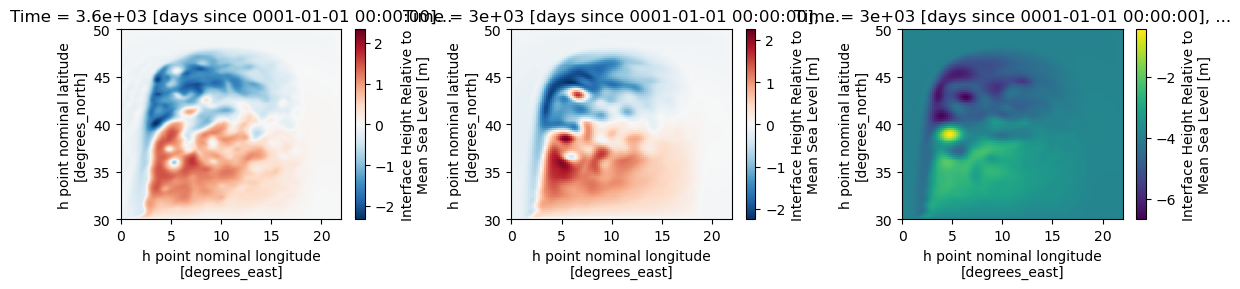

In [20]:
plt.figure(figsize=(12, 3))

plt.subplot(131)
exp_DG_HR['prog'].e.isel(Time=-1, zi=0).plot()

plt.subplot(132)
exp_DG_no_ANN['prog'].e.isel(Time=-1, zi=0).plot()

plt.subplot(133)
exp_DG_ANN['prog'].e.isel(Time=-1, zi=0).plot()

plt.tight_layout()

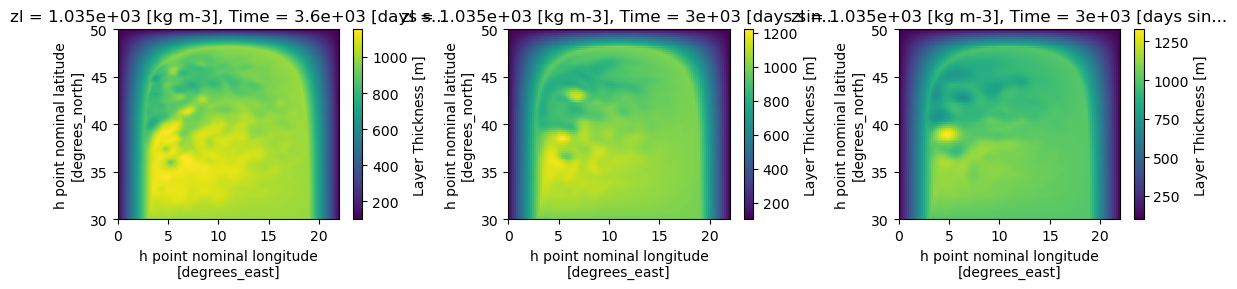

In [12]:
plt.figure(figsize=(12, 3))


plt.subplot(131)
exp_DG_HR['prog'].h.isel(Time=-1, zl=0).plot()

plt.subplot(132)
exp_DG_no_ANN['prog'].h.isel(Time=-1, zl=0).plot()

plt.subplot(133)
exp_DG_ANN['prog'].h.isel(Time=-1, zl=0).plot()

plt.tight_layout()

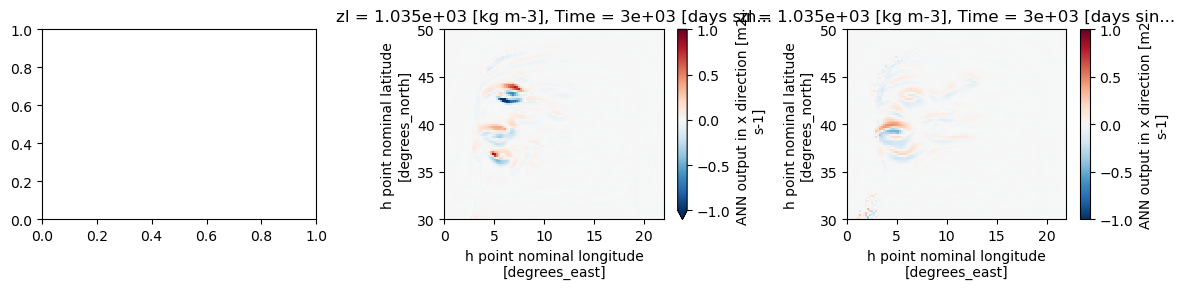

In [25]:
plt.figure(figsize=(12, 3))

plt.subplot(131)
#exp_DG_HR['prog'].Fx.isel(Time=-1, zl=0).plot()

plt.subplot(132)
exp_DG_no_ANN['prog'].Fx.isel(Time=-1, zl=0).plot(vmin=-1)

plt.subplot(133)
exp_DG_ANN['prog'].Fx.isel(Time=-1, zl=0).plot(vmin=-1)

plt.tight_layout()

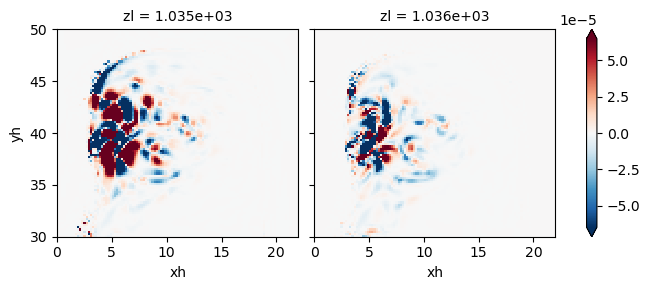

In [29]:
(exp_DG_ANN['prog'].dhdx*exp_DG_ANN['prog'].Fx + exp_DG_ANN['prog'].dhdy*exp_DG_ANN['prog'].Fy ).isel(Time=2000).plot(col='zl', robust=True)


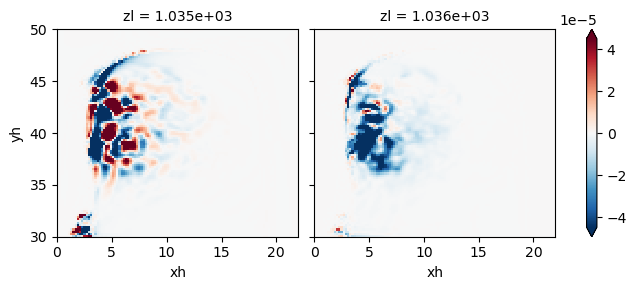

In [26]:
(exp_DG_ANN['prog'].dhdx*exp_DG_ANN['prog'].Fx + exp_DG_ANN['prog'].dhdy*exp_DG_ANN['prog'].Fy ).isel(Time=slice(2000, 3000)).mean('Time').plot(col='zl', robust=True)



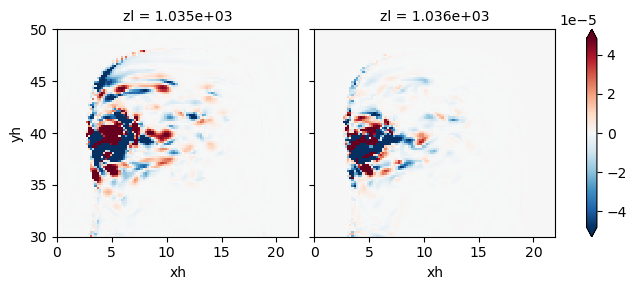

In [28]:
(exp_DG_no_ANN['prog'].dhdx*exp_DG_no_ANN['prog'].Fx + exp_DG_no_ANN['prog'].dhdy*exp_DG_no_ANN['prog'].Fy ).isel(Time=2000).plot(col='zl', robust=True)


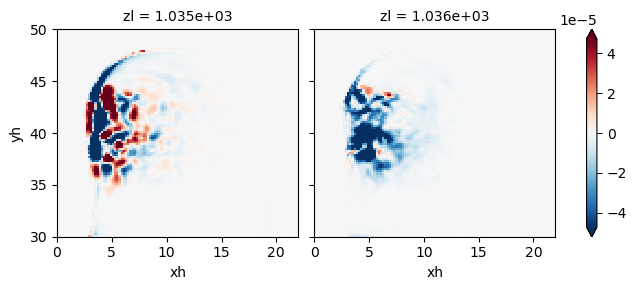

In [27]:
(exp_DG_no_ANN['prog'].dhdx*exp_DG_no_ANN['prog'].Fx + exp_DG_no_ANN['prog'].dhdy*exp_DG_no_ANN['prog'].Fy ).isel(Time=slice(2000, 3000)).mean('Time').plot(col='zl', robust=True)


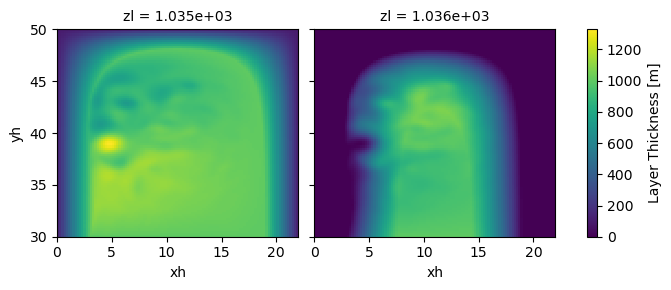

In [15]:
exp_DG_ANN['prog'].h.isel(Time=-1).plot(col='zl')

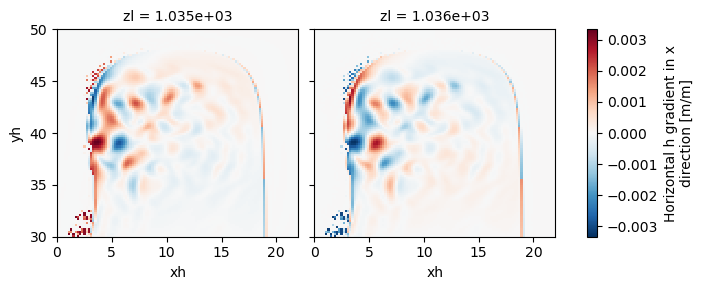

In [30]:
exp_DG_ANN['prog'].dhdx.isel(Time=-1).plot(col='zl')

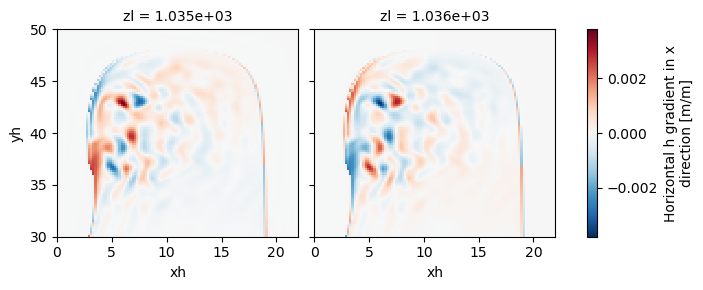

In [31]:
exp_DG_no_ANN['prog'].dhdx.isel(Time=-1).plot(col='zl')

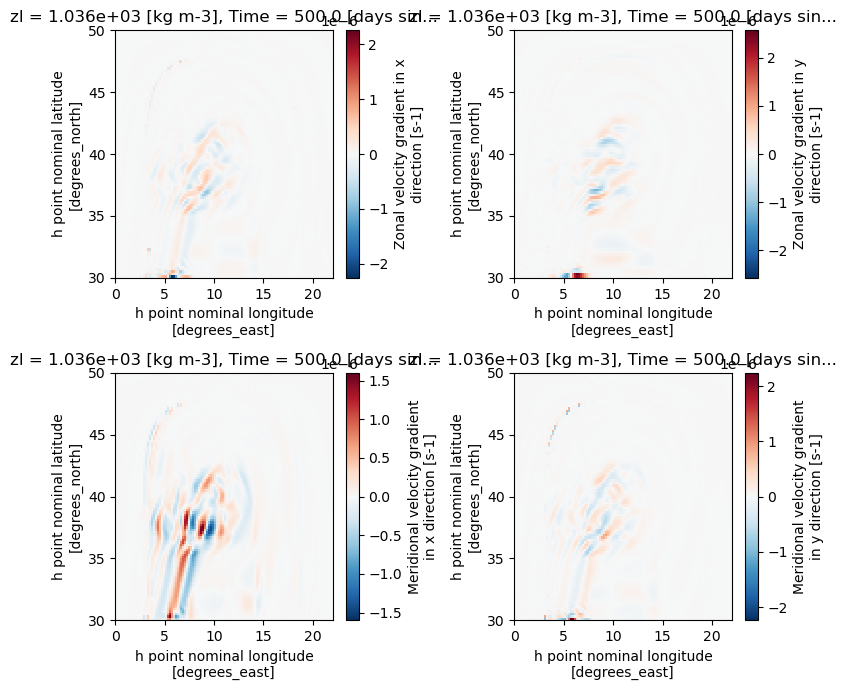

In [51]:
plt.figure(figsize=(8,7))

zl = 1
plt.subplot(221)
exp_DG['prog'].dudx.isel(Time=-1, zl=zl).plot()

plt.subplot(222)
exp_DG['prog'].dudy.isel(Time=-1, zl=zl).plot()

plt.subplot(223)
exp_DG['prog'].dvdx.isel(Time=-1, zl=zl).plot()

plt.subplot(224)
exp_DG['prog'].dvdy.isel(Time=-1, zl=zl).plot()

plt.tight_layout()

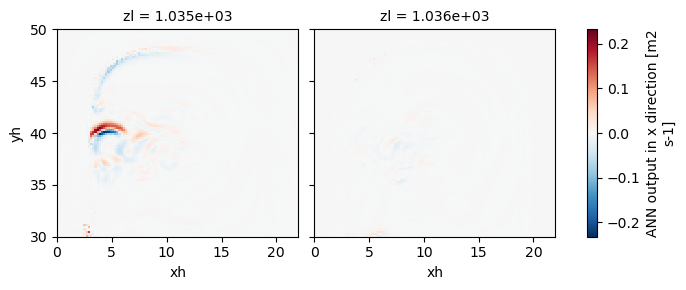

In [52]:
exp_DG['prog'].Fx.isel(Time=-1).plot(col='zl')

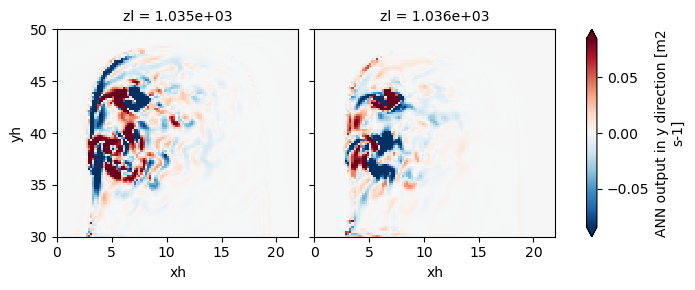

In [13]:
exp_DG_no_ANN['prog'].Fy.isel(Time=-1).plot(col='zl', robust=True)

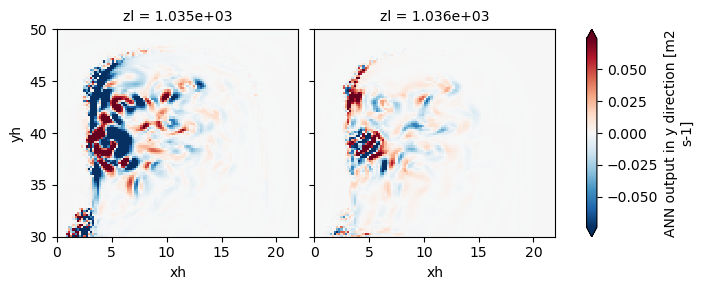

In [14]:
exp_DG_ANN['prog'].Fy.isel(Time=-1).plot(col='zl', robust=True)

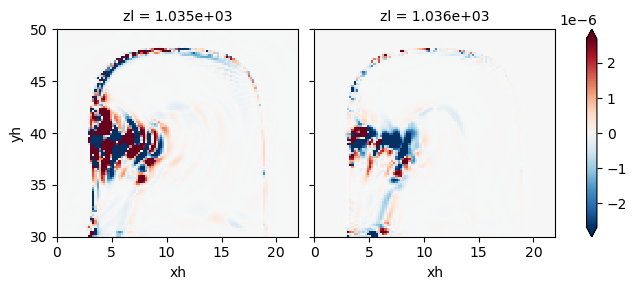

In [64]:
(exp_DG['prog'].dhdx*exp_DG['prog'].Fx + exp_DG['prog'].dhdy*exp_DG['prog'].Fy ).isel(Time=350).plot(col='zl', robust=True)

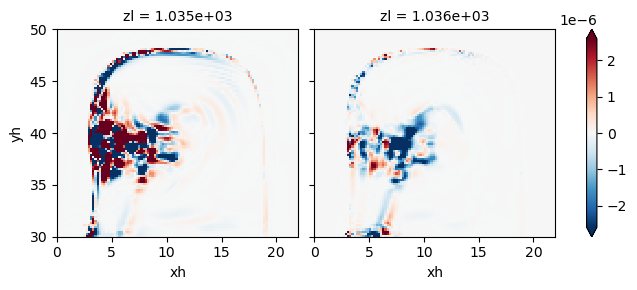

In [65]:
(exp_DG['prog'].dhdx*exp_DG['prog'].Fx + exp_DG['prog'].dhdy*exp_DG['prog'].Fy ).isel(Time=slice(350, 500)).mean('Time').plot(col='zl', robust=True)

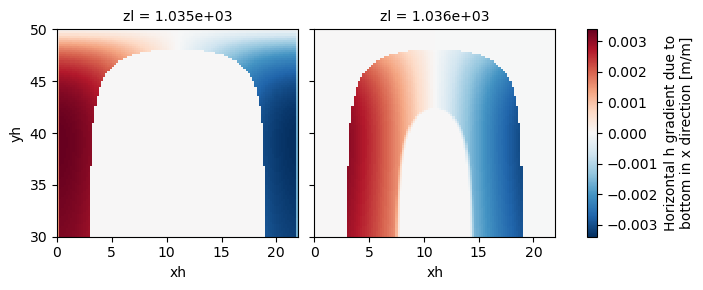

In [54]:
exp_DG['prog'].dhbardx.isel(Time=0).plot(col='zl')

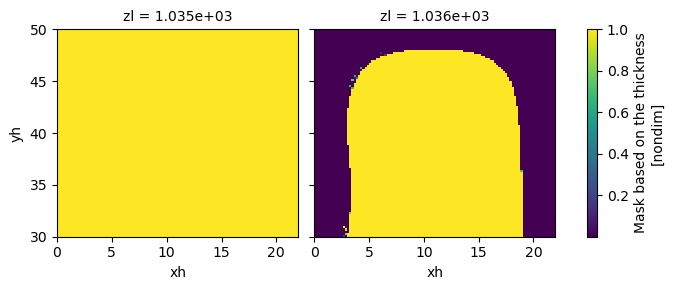

In [55]:
exp_DG['prog'].h_mask.isel(Time=-1).plot(col='zl')

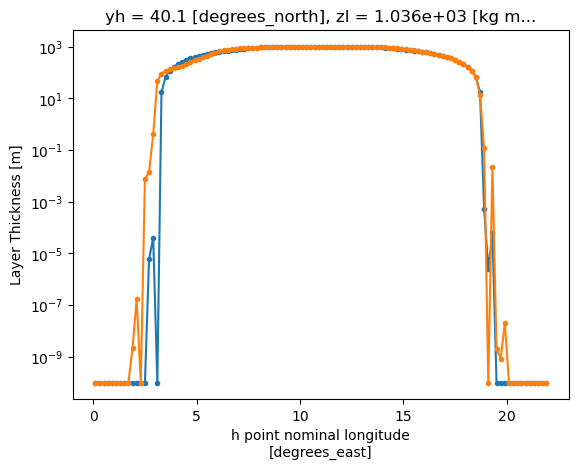

In [56]:
exp_DG['prog'].h.isel(Time=0, zl=1).sel(yh=40, method='nearest').plot(marker='.')
exp_DG['prog'].h.isel(Time=-1, zl=1).sel(yh=40, method='nearest').plot(marker='.')
plt.yscale('log')

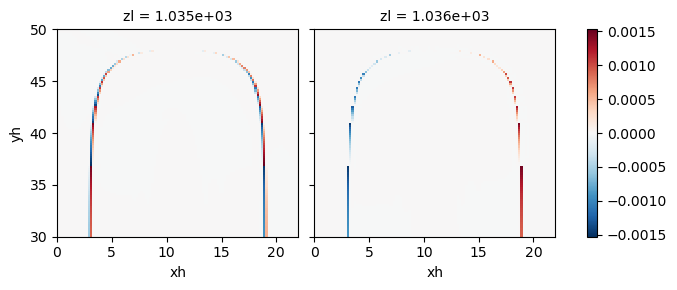

In [57]:
(exp_DG['prog'].dhdx*exp_DG['prog'].h_mask).isel(Time=0).plot(col='zl')

In [3]:
exp_ANN_no_decompose = load_data('/scratch/db194/mom6/mar2025/phillips2layer/Phillips_2layer_ann_nondim_test_2/')

ERROR 1: PROJ: proj_create_from_database: Open of /ext3/miniforge/share/proj failed


In [4]:
exp_ANN_decompose = load_data('/scratch/db194/mom6/mar2025/phillips2layer/Phillips_2layer_ann_nondim_test_3/')

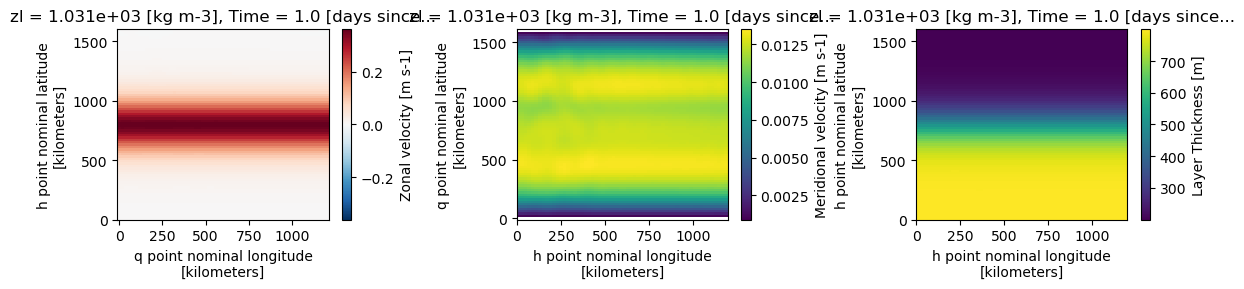

In [5]:
plt.figure(figsize=(12,3))

plt.subplot(131)
exp_ANN_decompose['prog'].u.isel(Time=0, zl=0).plot()

plt.subplot(132)
exp_ANN_decompose['prog'].v.isel(Time=0, zl=0).plot()

plt.subplot(133)
exp_ANN_decompose['prog'].h.isel(Time=0, zl=0).plot()

plt.tight_layout()

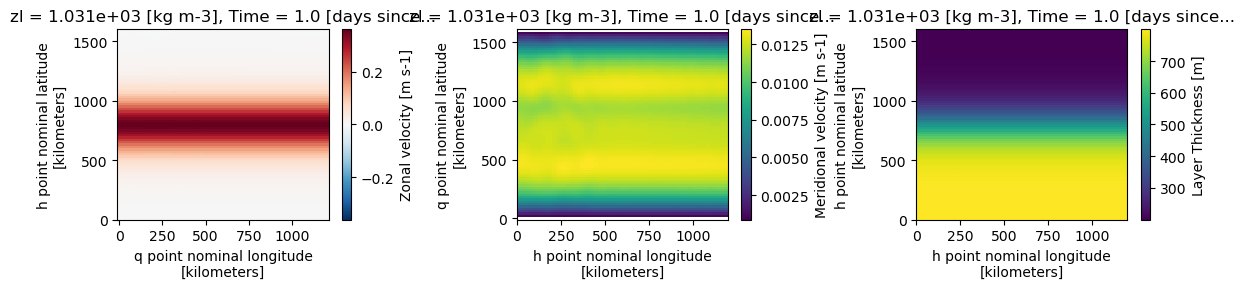

In [6]:
plt.figure(figsize=(12,3))

plt.subplot(131)
exp_ANN_no_decompose['prog'].u.isel(Time=0, zl=0).plot()

plt.subplot(132)
exp_ANN_no_decompose['prog'].v.isel(Time=0, zl=0).plot()

plt.subplot(133)
exp_ANN_no_decompose['prog'].h.isel(Time=0, zl=0).plot()

plt.tight_layout()

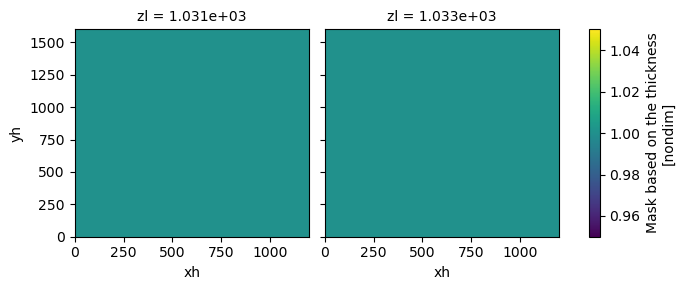

In [9]:
exp_ANN_decompose['prog'].h_mask.isel(Time=-1).plot(col='zl')

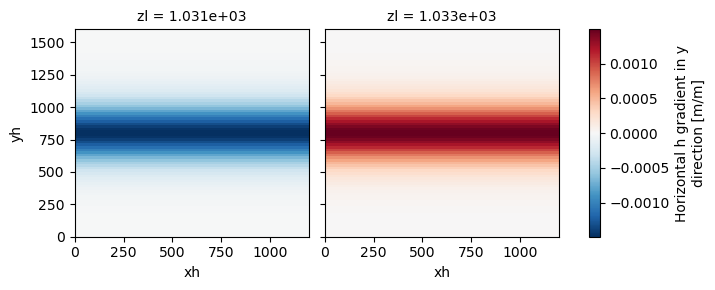

In [10]:
exp_ANN_decompose['prog'].dhdy.isel(Time=-1).plot(col='zl')

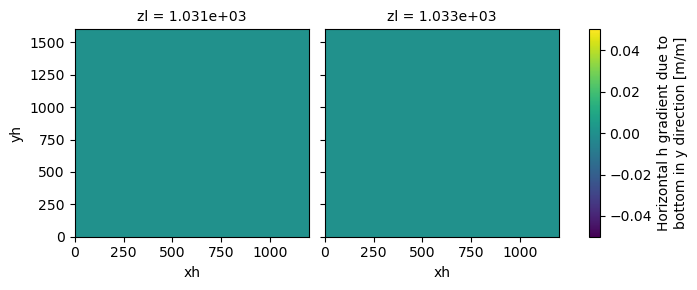

In [11]:
exp_ANN_decompose['prog'].dhbardy.isel(Time=-1).plot(col='zl')

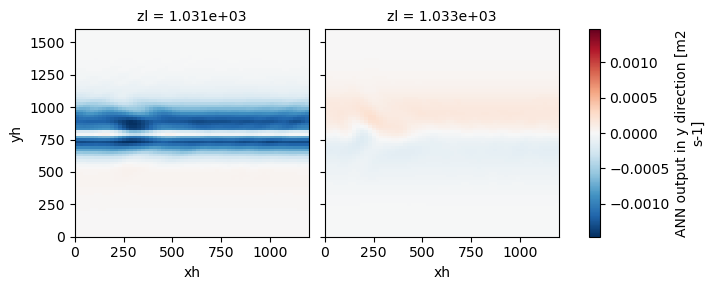

In [13]:
exp_ANN_decompose['prog'].Fy.isel(Time=-1).plot(col='zl')

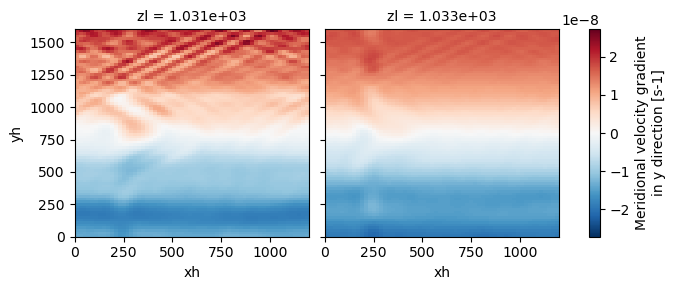

In [19]:
exp_ANN_decompose['prog'].dvdy.isel(Time=-1).plot(col='zl')

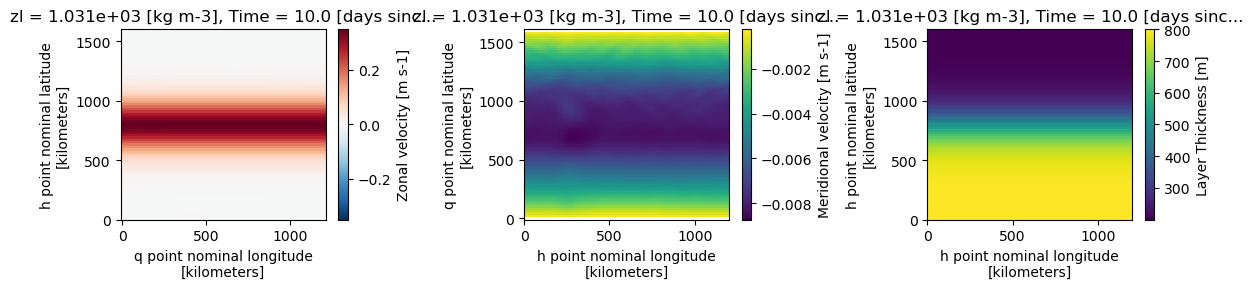

In [39]:
plt.figure(figsize=(12,3))

plt.subplot(131)
exp_ANN['prog'].u.isel(Time=0, zl=0).plot()

plt.subplot(132)
exp_ANN['prog'].v.isel(Time=0, zl=0).plot()

plt.subplot(133)
exp_ANN['prog'].h.isel(Time=0, zl=0).plot()

plt.tight_layout()

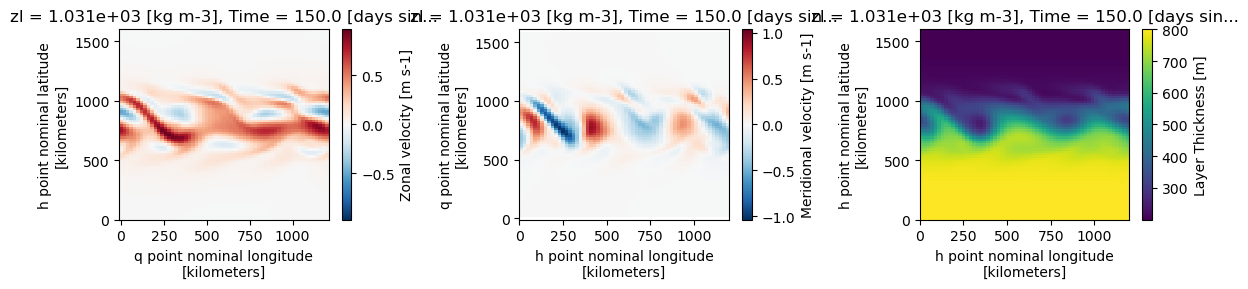

In [40]:
plt.figure(figsize=(12,3))

plt.subplot(131)
exp_ANN['prog'].u.isel(Time=-1, zl=0).plot()

plt.subplot(132)
exp_ANN['prog'].v.isel(Time=-1, zl=0).plot()

plt.subplot(133)
exp_ANN['prog'].h.isel(Time=-1, zl=0).plot()

plt.tight_layout()

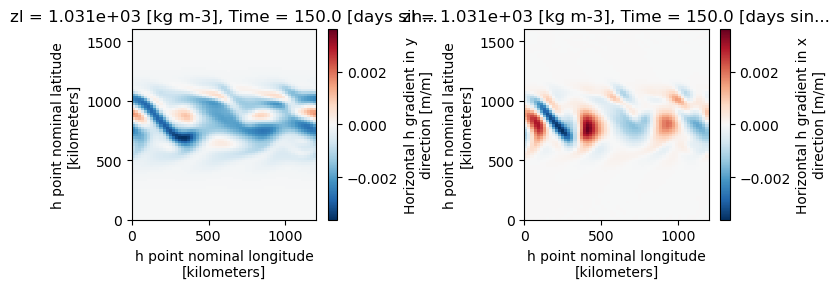

In [41]:
plt.figure(figsize=(8,3))

plt.subplot(121)
exp_ANN['prog'].dhdy.isel(Time=-1, zl=0).plot()

plt.subplot(122)
exp_ANN['prog'].dhdx.isel(Time=-1, zl=0).plot()

plt.tight_layout()

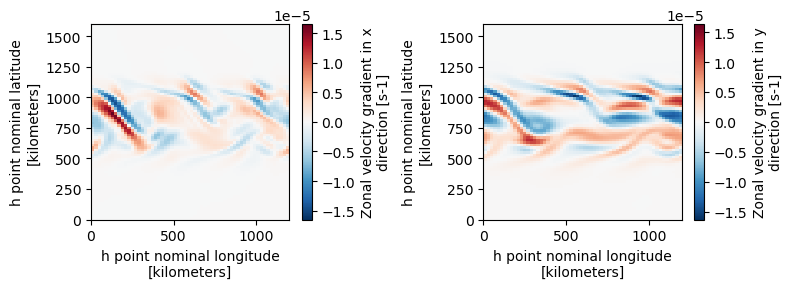

In [42]:
plt.figure(figsize=(8,3))

plt.subplot(121)
exp_ANN['prog'].dudx.isel(Time=-1, zl=0).plot()
plt.title('')


plt.subplot(122)
exp_ANN['prog'].dudy.isel(Time=-1, zl=0).plot()
plt.title('')

plt.tight_layout()

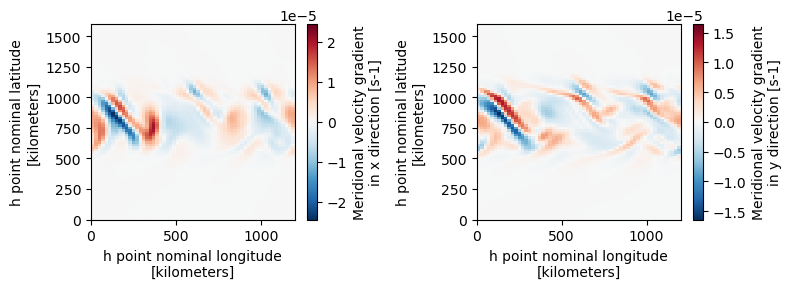

In [43]:
plt.figure(figsize=(8,3))

plt.subplot(121)
exp_ANN['prog'].dvdx.isel(Time=-1, zl=0).plot()
plt.title('')


plt.subplot(122)
exp_ANN['prog'].dvdy.isel(Time=-1, zl=0).plot()
plt.title('')

plt.tight_layout()

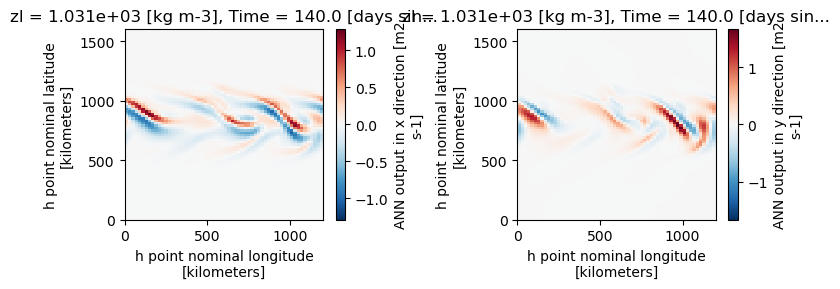

In [44]:
plt.figure(figsize=(8,3))

plt.subplot(121)
exp_ANN['prog'].Fx.isel(Time=-2, zl=0).plot()

plt.subplot(122)
exp_ANN['prog'].Fy.isel(Time=-2, zl=0).plot()

plt.tight_layout()

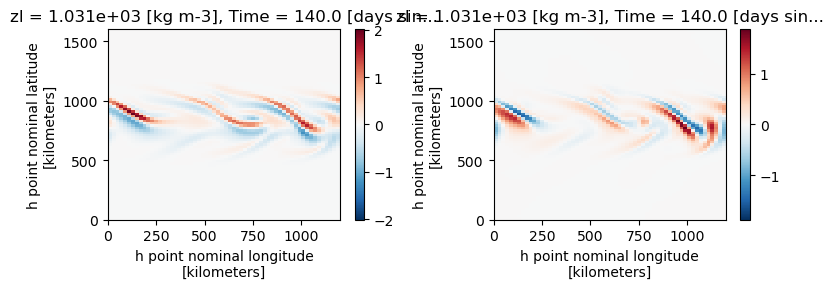

In [45]:
plt.figure(figsize=(8,3))

plt.subplot(121)
((0.1*20e3**2)*(exp_ANN['prog'].dudx * exp_ANN['prog'].dhdx + exp_ANN['prog'].dudy * exp_ANN['prog'].dhdy)).isel(Time=-2, zl=0).plot()

plt.subplot(122)
((0.1*20e3**2)*(exp_ANN['prog'].dvdx * exp_ANN['prog'].dhdx + exp_ANN['prog'].dvdy * exp_ANN['prog'].dhdy)).isel(Time=-2, zl=0).plot()

plt.tight_layout()

In [3]:
exp_GM = load_data('/scratch/db194/mom6/mar2025/phillips2layer/Phillips_2layer_GM_test/')

ERROR 1: PROJ: proj_create_from_database: Open of /ext3/miniforge/share/proj failed


In [4]:
exp_ANN_GM = load_data('/scratch/db194/mom6/mar2025/phillips2layer/Phillips_2layer_GMann_test/')

In [5]:
exp_ANN_GM_rot = load_data('/scratch/db194/mom6/mar2025/phillips2layer/Phillips_2layer_GMann_rot_nondim_test/')

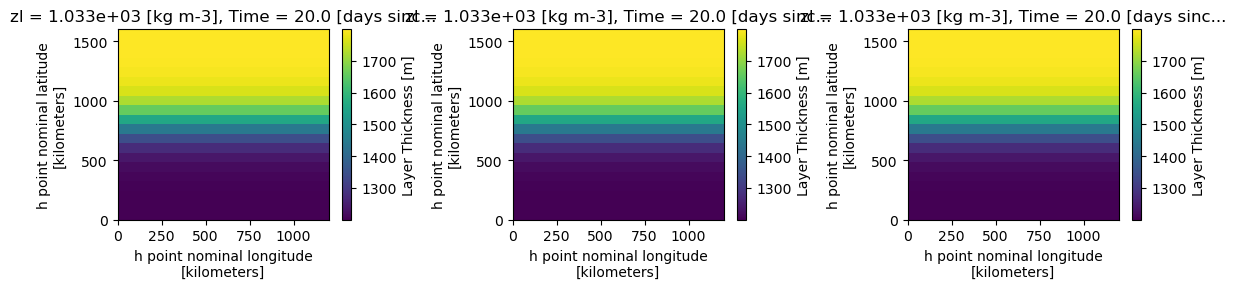

In [6]:
plt.figure(figsize=(12, 3))

plt.subplot(131)
exp_GM['prog'].h.isel(zl=1, Time=-1).plot()

plt.subplot(132)
exp_ANN_GM['prog'].h.isel(zl=1, Time=-1).plot()

plt.subplot(133)
exp_ANN_GM_rot['prog'].h.isel(zl=1, Time=-1).plot()


plt.tight_layout()

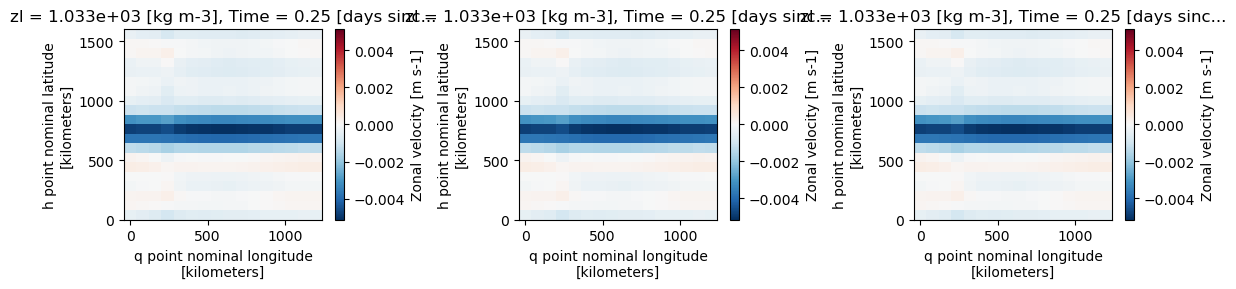

In [7]:
plt.figure(figsize=(12, 3))

idT = 0

plt.subplot(131)
exp_GM['prog'].u.isel(zl=1, Time=idT).plot()

plt.subplot(132)
exp_ANN_GM['prog'].u.isel(zl=1, Time=idT).plot()

plt.subplot(133)
exp_ANN_GM_rot['prog'].u.isel(zl=1, Time=idT).plot()

plt.tight_layout()

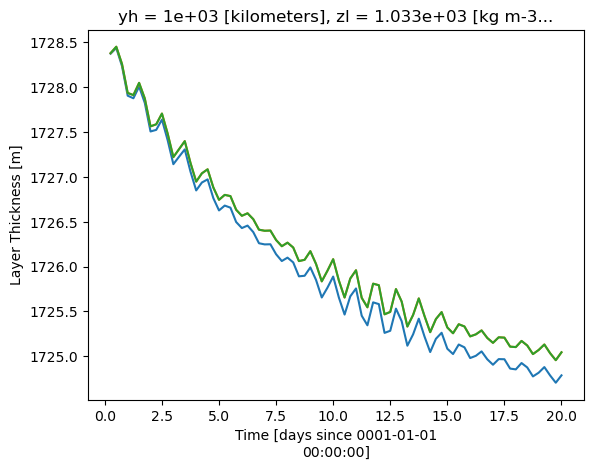

In [9]:
exp_GM['prog'].h.isel(zl=1).sel(xh=250, yh=1000, method='nearest').plot()
exp_ANN_GM['prog'].h.isel(zl=1).sel(xh=250, yh=1000, method='nearest').plot()
exp_ANN_GM_rot['prog'].h.isel(zl=1).sel(xh=250, yh=1000, method='nearest').plot()

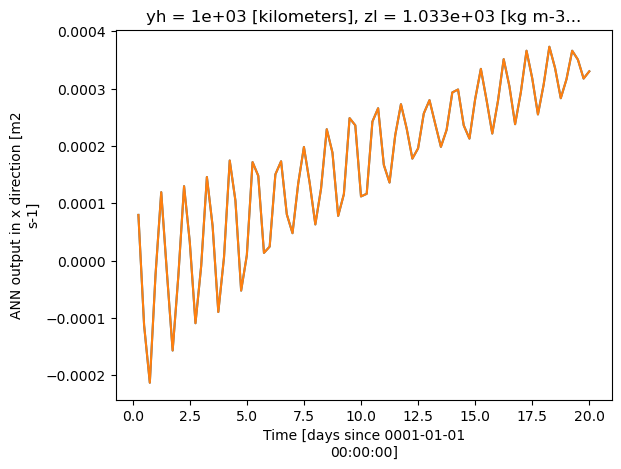

In [11]:
exp_ANN_GM_rot['prog'].Fx.isel(zl=1).sel(xh=250, yh=1000, method='nearest').plot()
exp_ANN_GM['prog'].Fx.isel(zl=1).sel(xh=250, yh=1000, method='nearest').plot()

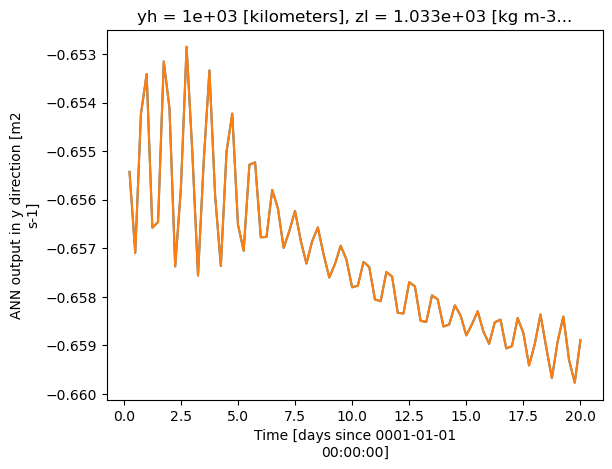

In [12]:
exp_ANN_GM_rot['prog'].Fy.isel(zl=1).sel(xh=250, yh=1000, method='nearest').plot()
exp_ANN_GM['prog'].Fy.isel(zl=1).sel(xh=250, yh=1000, method='nearest').plot()

### Old

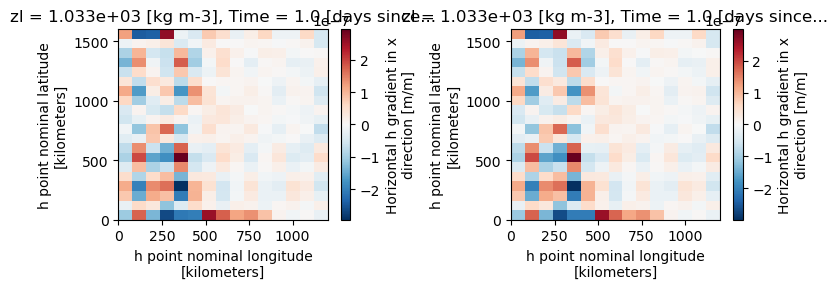

In [126]:
plt.figure(figsize=(8, 3))

plt.subplot(121)
exp_ANN['prog'].dhdx.isel(zl=1, Time=-1).plot()

plt.subplot(122)
exp_ANN_4core['prog'].dhdx.isel(zl=1, Time=-1).plot()

plt.tight_layout()

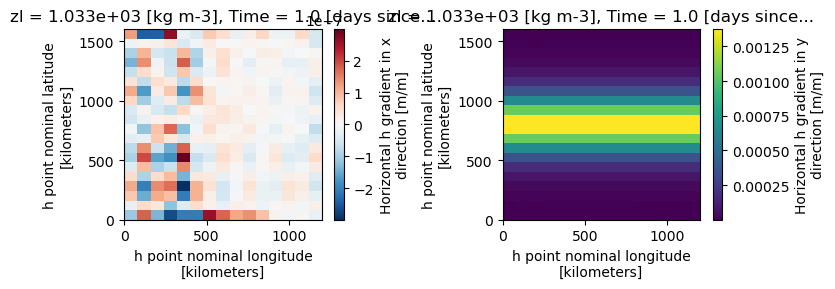

In [127]:
plt.figure(figsize=(8, 3))

plt.subplot(121)
exp_ANN_4core['prog'].dhdx.isel(zl=1, Time=-1).plot()

plt.subplot(122)
exp_ANN_4core['prog'].dhdy.isel(zl=1, Time=-1).plot()

plt.tight_layout()

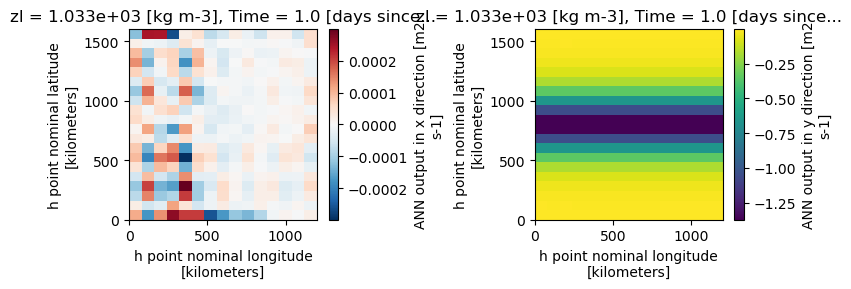

In [128]:
plt.figure(figsize=(8, 3))

plt.subplot(121)
exp_ANN_4core['prog'].Fx.isel(zl=1, Time=-1).plot()

plt.subplot(122)
exp_ANN_4core['prog'].Fy.isel(zl=1, Time=-1).plot()

plt.tight_layout()

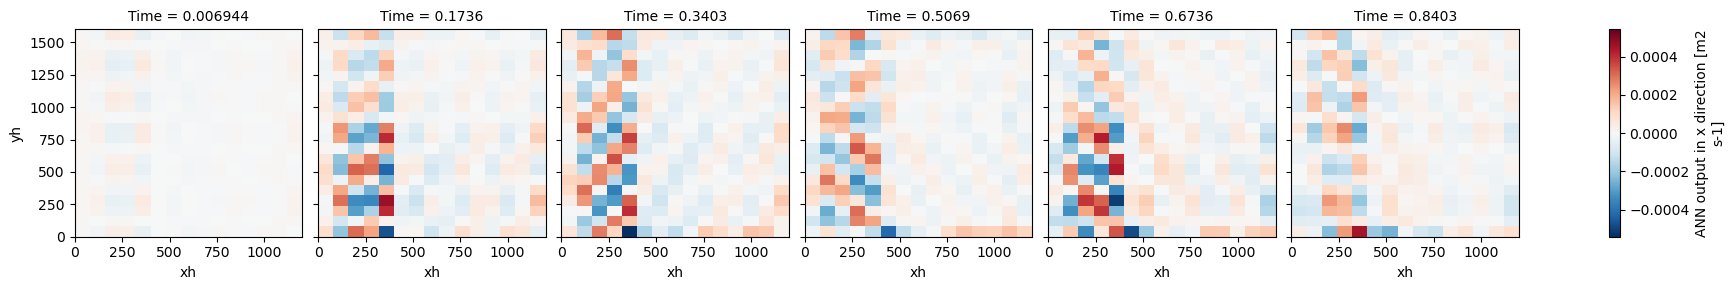

In [129]:
exp_ANN_4core['prog'].Fx.isel(zl=1, Time=slice(0, 144, 24)).plot(col='Time')

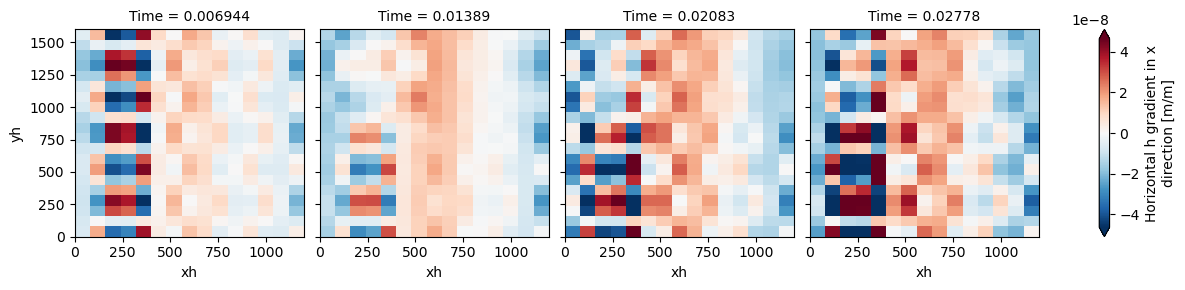

In [131]:
exp_ANN['prog'].dhdx.isel(zl=1, Time=slice(0, 4)).plot(col='Time', robust=True)

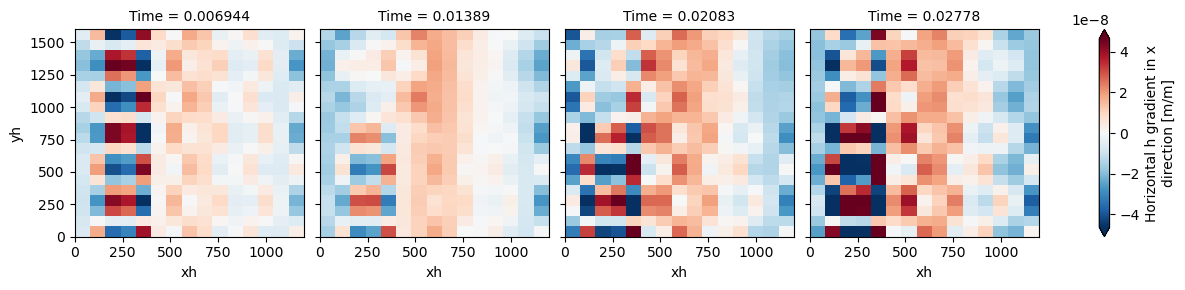

In [130]:
exp_ANN_4core['prog'].dhdx.isel(zl=1, Time=slice(0, 4)).plot(col='Time', robust=True)

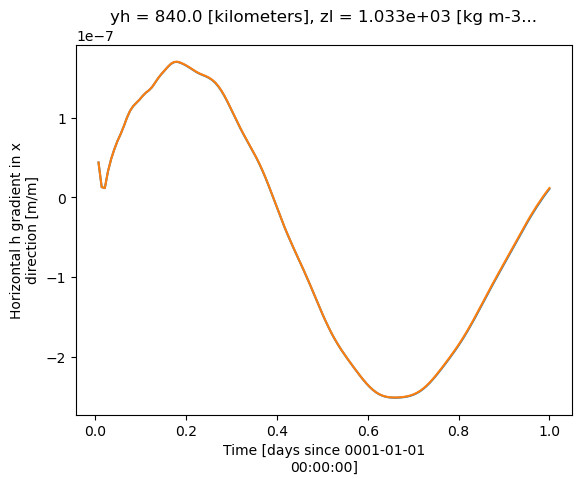

In [132]:
exp_ANN['prog'].dhdx.isel(zl=1, xh=2, yh= 10).plot()
exp_ANN_4core['prog'].dhdx.isel(zl=1, xh=2, yh= 10).plot()

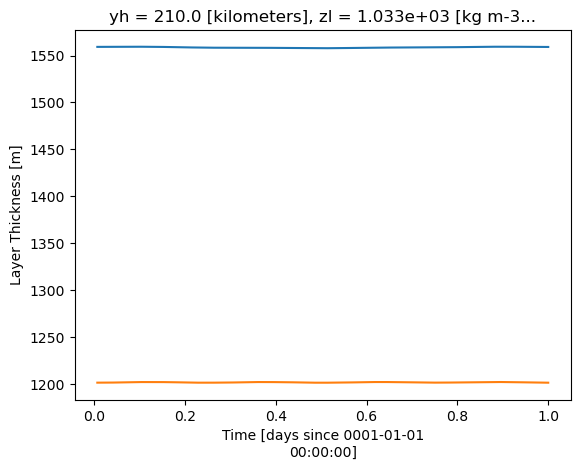

In [122]:
exp_ANN['prog'].h.isel(zl=1, xh=2, yh= 10).plot()
exp_ANN_4core['prog'].h.isel(zl=1, xh=2, yh= 10).plot()

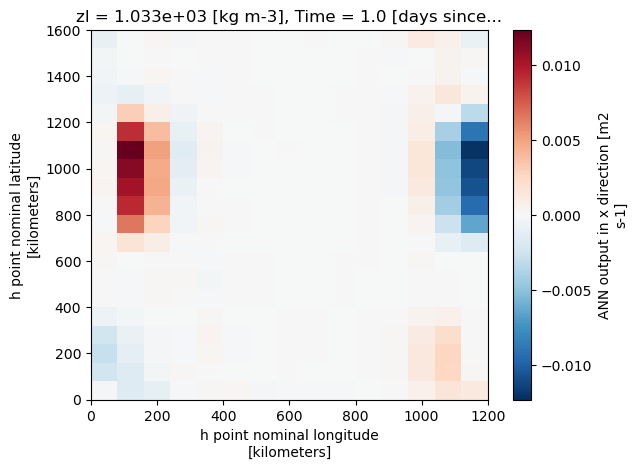

In [96]:
exp_ANN_4core['prog'].Fx.isel(zl=1, Time=-1).plot()

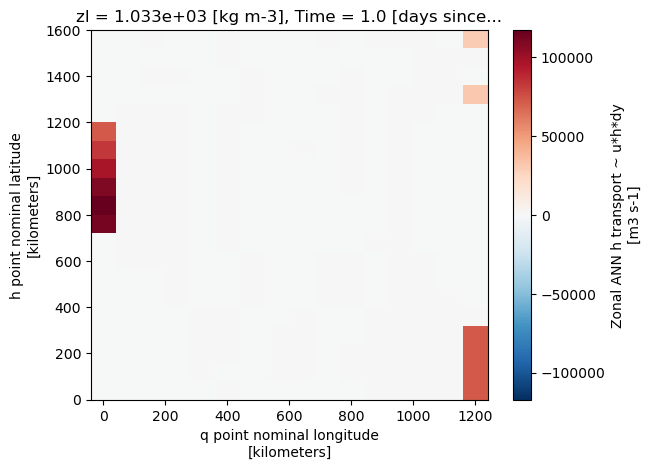

In [97]:
exp_ANN_4core['prog'].uhTrANN.isel(zl=1, Time=-1).plot()

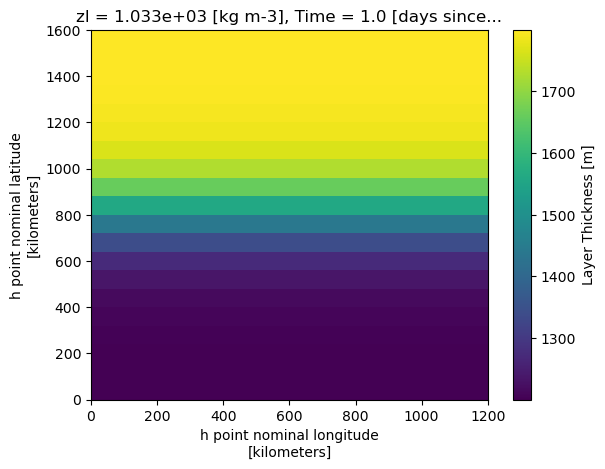

In [55]:
exp_ANN['prog'].h.isel(zl=1, Time=-1).plot()

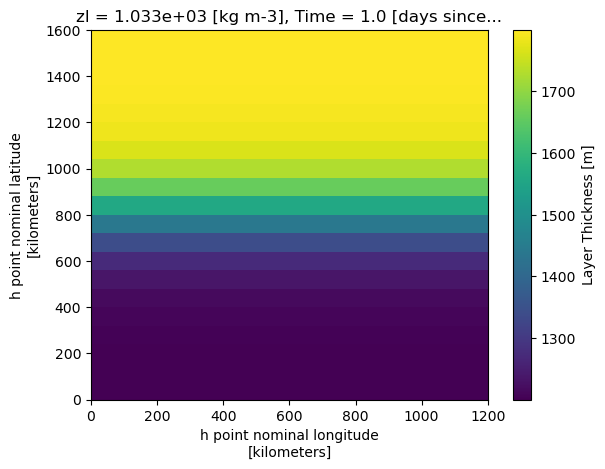

In [56]:
exp_ANN['prog'].h.isel(zl=1, Time=-1).plot()

In [101]:
exp_GM = load_data('/scratch/db194/mom6/mar2025/phillips2layer/Phillips_2layer_GM_test/')

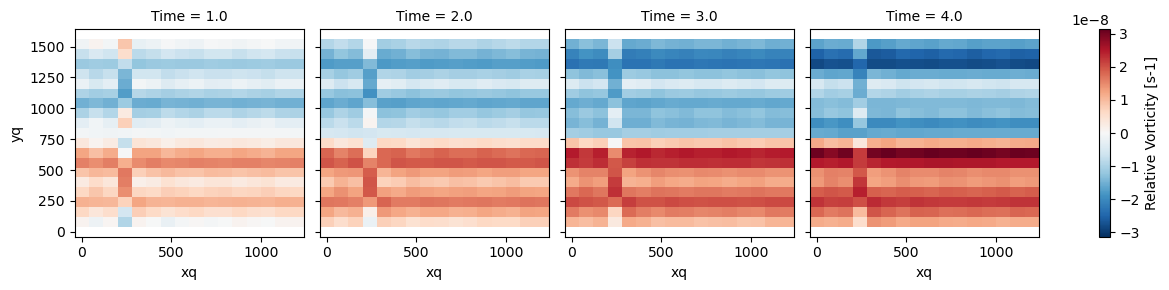

In [102]:
exp_GM['prog'].RV.isel(zl=1).plot(col='Time')

In [103]:
exp_ANN['prog']

<xarray.Dataset>
Dimensions:  (xq: 16, yh: 20, zl: 2, Time: 144, xh: 15, yq: 21, zi: 3)
Coordinates:
  * xq       (xq) float64 0.0 80.0 160.0 240.0 ... 1.04e+03 1.12e+03 1.2e+03
  * yh       (yh) float64 40.0 120.0 200.0 280.0 ... 1.4e+03 1.48e+03 1.56e+03
  * zl       (zl) float64 1.031e+03 1.033e+03
  * Time     (Time) float64 0.006944 0.01389 0.02083 ... 0.9861 0.9931 1.0
  * xh       (xh) float64 40.0 120.0 200.0 280.0 ... 1e+03 1.08e+03 1.16e+03
  * yq       (yq) float64 0.0 80.0 160.0 240.0 ... 1.44e+03 1.52e+03 1.6e+03
  * zi       (zi) float64 1.03e+03 1.032e+03 1.034e+03
Data variables:
    u        (Time, zl, yh, xq) float32 dask.array<chunksize=(144, 2, 20, 16), meta=np.ndarray>
    v        (Time, zl, yq, xh) float32 dask.array<chunksize=(144, 2, 21, 15), meta=np.ndarray>
    h        (Time, zl, yh, xh) float64 dask.array<chunksize=(144, 2, 20, 15), meta=np.ndarray>
    dhdx     (Time, zl, yh, xh) float64 dask.array<chunksize=(144, 2, 20, 15), meta=np.ndarray>
    dhdy     (Time, zl, yh, xh) float64 dask.array<chunksize=(144, 2, 20, 15), meta=np.ndarray>
    Fx       (Time, zl, yh, xh) float64 dask.array<chunksize=(144, 2, 20, 15), meta=np.ndarray>
    Fy       (Time, zl, yh, xh) float64 dask.array<chunksize=(144, 2, 20, 15), meta=np.ndarray>
    uhTrANN  (Time, zl, yh, xq) float64 dask.array<chunksize=(144, 2, 20, 16), meta=np.ndarray>
    vhTrANN  (Time, zl, yq, xh) float64 dask.array<chunksize=(144, 2, 21, 15), meta=np.ndarray>
    e        (Time, zi, yh, xh) float32 dask.array<chunksize=(144, 3, 20, 15), meta=np.ndarray>
    RV       (Time, zl, yq, xq) float32 dask.array<chunksize=(144, 2, 21, 16), meta=np.ndarray>
    PV       (Time, zl, yq, xq) float32 dask.array<chunksize=(144, 2, 21, 16), meta=np.ndarray>
Attributes:
    filename:   prog_00.nc
    title:      Phillips experiment
    grid_type:  regular
    grid_tile:  N/A

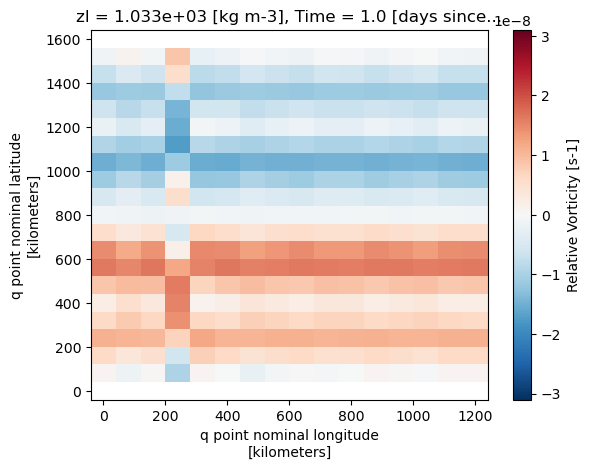

In [106]:
exp_ANN['prog'].RV.isel(zl=1, Time=-1).plot(vmin=-3.1e-8)

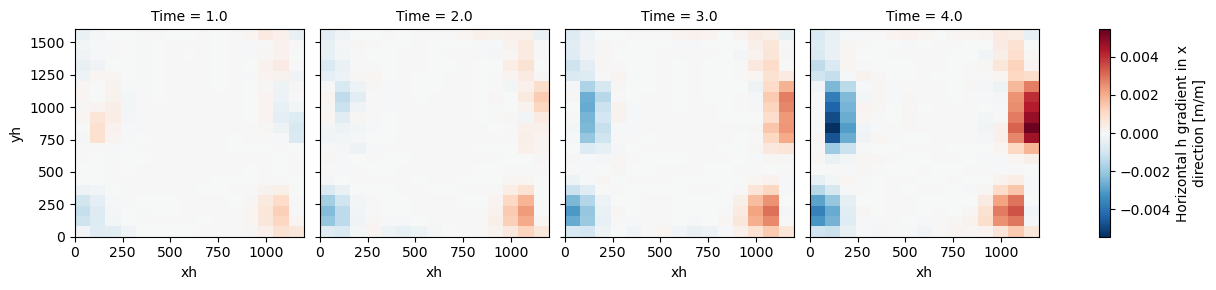

In [83]:
exp_ANN['prog'].dhdx.isel(zl=0).plot(col='Time')

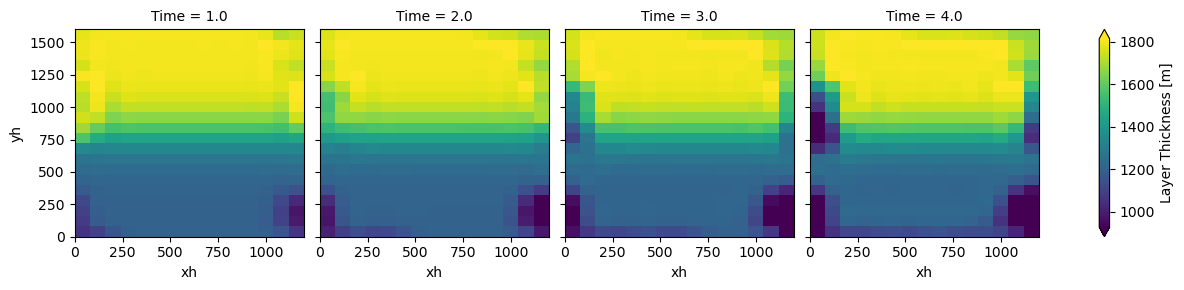

In [84]:
exp_ANN['prog'].h.isel(zl=1).plot(col='Time', robust=True)

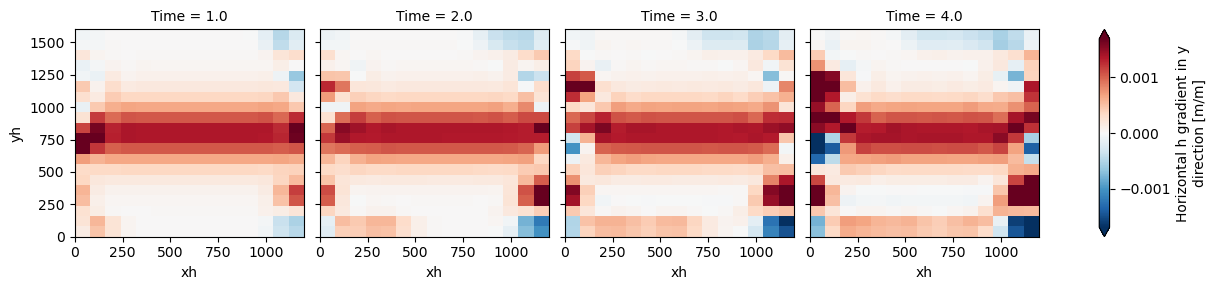

In [85]:
exp_ANN['prog'].dhdy.isel(zl=1).plot(col='Time', robust=True)

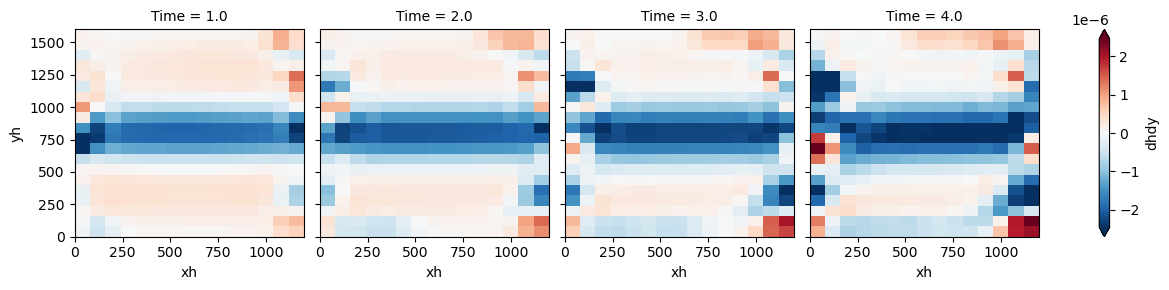

In [86]:
 (exp_ANN['prog'].dhdy.isel(zl=0) + exp_ANN['prog'].dhdy.isel(zl=1) ).plot(col='Time', robust=True)

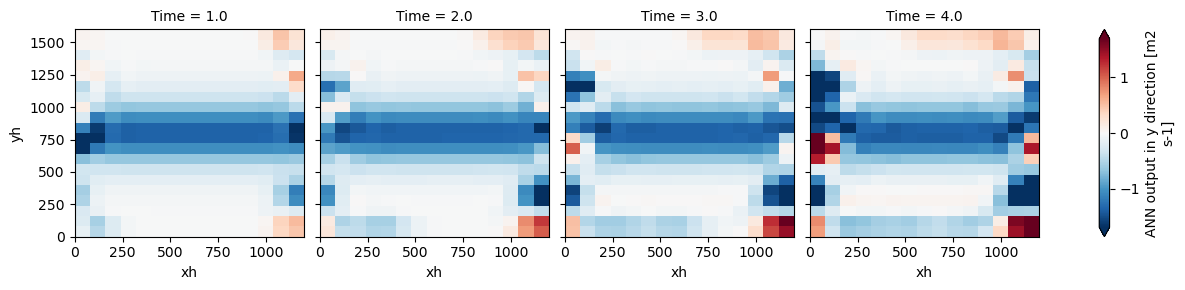

In [87]:
exp_ANN['prog'].Fy.isel(zl=1).plot(col='Time', robust=True)

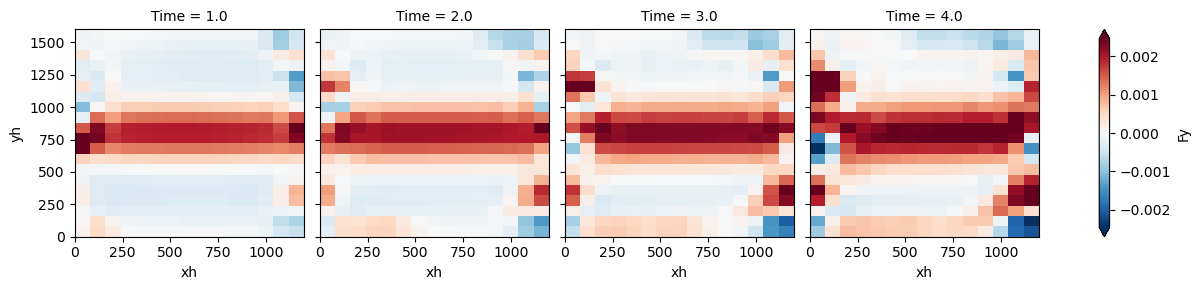

In [88]:
(exp_ANN['prog'].Fy.isel(zl=0) + exp_ANN['prog'].Fy.isel(zl=1)).plot(col='Time', robust=True)

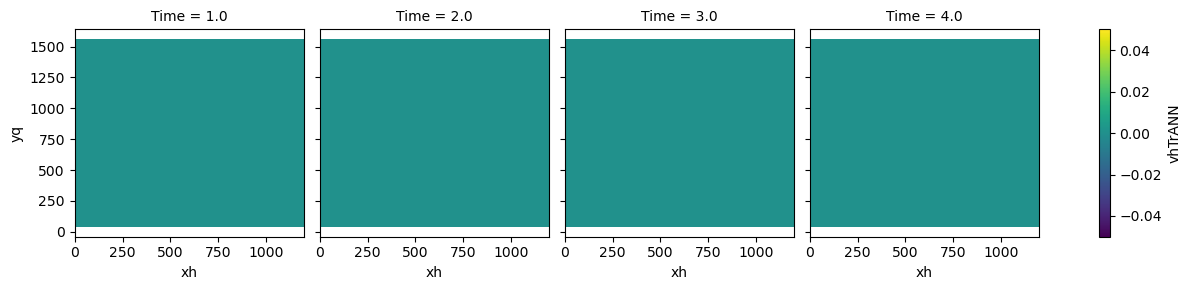

In [89]:
(exp_ANN['prog'].vhTrANN.isel(zl=0) + exp_ANN['prog'].vhTrANN.isel(zl=1)).plot(col='Time', robust=True)

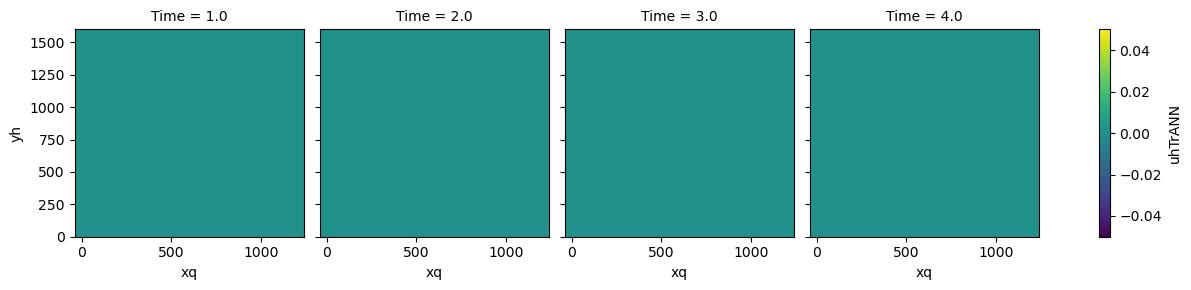

In [90]:
(exp_ANN['prog'].uhTrANN.isel(zl=0) + exp_ANN['prog'].uhTrANN.isel(zl=1)).plot(col='Time', robust=True)

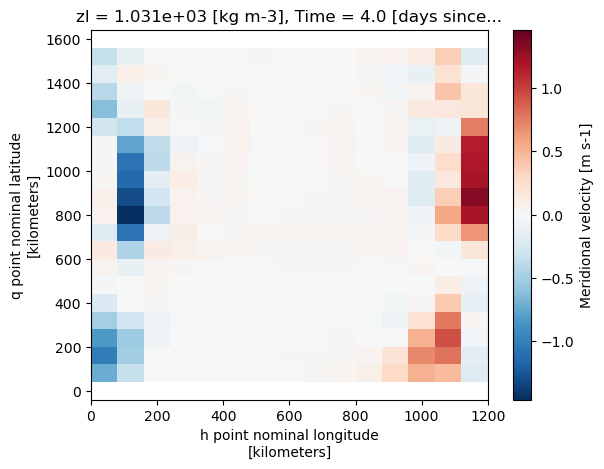

In [92]:
exp_ANN['prog'].v.isel(zl=0, Time=-1).plot()

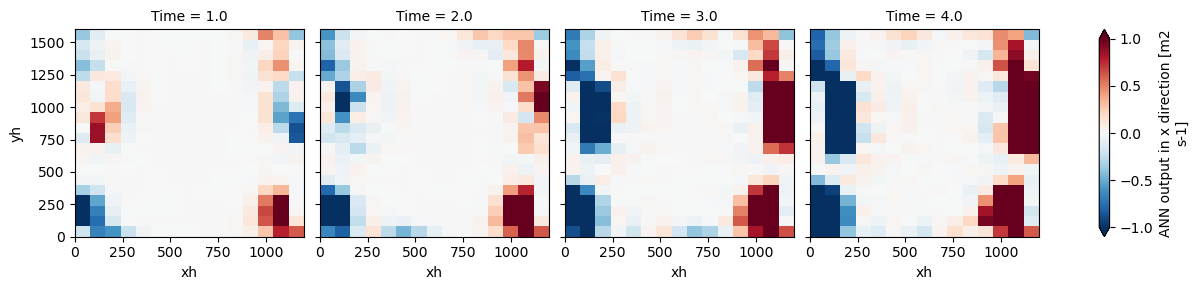

In [66]:
exp_ANN['prog'].Fx.isel(zl=1).plot(col='Time', vmin=-1)

In [74]:
1200/15

80.0

In [77]:
0.25 * 0.8 / ( 600 * ( 2/80e3**2 ) )

1066666.6666666667